# Data Pre-processing

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [133]:
from sklearn import preprocessing as ps
from sklearn import metrics
from sklearn.model_selection import RepeatedKFold , StratifiedKFold
from sklearn.preprocessing import StandardScaler as sc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

In [134]:
from sklearn import tree
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [135]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Access the file in MyDrive/Colab Notebooks/
file_path = '/content/drive/MyDrive/Colab Notebooks/POC.csv'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [136]:
file_path = '/content/drive/MyDrive/Colab Notebooks/POC.csv'

In [137]:
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Specify the full path to the CSV file
file_path = '/content/drive/MyDrive/Colab Notebooks/POC.csv'

# Read the CSV file
pcos_dt = pd.read_csv(file_path)
pcos_dt.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 42
0,1,10001,0,28,44.6,152.0,19.300000,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,10002,0,36,65.0,161.5,24.921163,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,10003,1,33,68.8,165.0,25.270891,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,10004,0,37,65.0,148.0,29.674945,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,10005,0,25,52.0,161.0,20.060954,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


In [138]:
pcos_dt.shape

(541, 43)

In [139]:
pcos_dt.columns

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)',
       'Waist:Hip Ratio', 'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)',
       'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)',
       'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)',
       'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)',
       'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)', 'Follicle No. (L)',
       'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)',
       'Endometrium (mm)', 'Unnamed: 42'],
      dtype='object')

In [140]:
#To remove whitespaces at both ends from a column name

pcos_dt.columns = pcos_dt.columns.str.strip()

In [141]:
pcos_dt.columns

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', 'Age (yrs)', 'Weight (Kg)',
       'Height(Cm)', 'BMI', 'Blood Group', 'Pulse rate(bpm)',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)',
       'Waist:Hip Ratio', 'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)',
       'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)',
       'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)',
       'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)',
       'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)', 'Follicle No. (L)',
       'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)',
       'Endometrium (mm)', 'Unnamed: 42'],
      dtype='object')

## Removing unwanted columns


In [142]:
pcos_dt.drop(['Sl. No', 'Patient File No.','Fast food (Y/N)'],axis='columns',inplace=True)

### Imputing Missing values

Rows with unmatching values are removed and some values are replaced

In [146]:
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Specify the full path to the CSV file
file_path = '/content/drive/MyDrive/Colab Notebooks/POC.csv'

# Read the CSV file
pcos_dt = pd.read_csv(file_path)

# Display the columns in the DataFrame
print(pcos_dt.columns)

# Replace missing values in a specific column with the median of that column
# Example: Replace missing values in ')' with the median of the column
median_value = pcos_dt['Blood Group'].median()
pcos_dt['Blood Group'].fillna(median_value, inplace=True)

# Verify the changes
pcos_dt.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)',
       'Waist:Hip Ratio', 'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)',
       'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)',
       'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)',
       'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)',
       'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)', 'Follicle No. (L)',
       'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)',
       'Endometrium (mm)', 'Unnamed: 42'],
      dtype='object')


,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 42
0,1,10001,0,28,44.6,152.0,19.300000,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,10002,0,36,65.0,161.5,24.921163,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,10003,1,33,68.8,165.0,25.270891,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,10004,0,37,65.0,148.0,29.674945,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,10005,0,25,52.0,161.0,20.060954,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


Searching for columns with missing values

In [147]:
pcos_dt.isnull().sum()

Sl. No                     0
Patient File No.           0
PCOS (Y/N)                 0
 Age (yrs)                 0
Weight (Kg)                0
Height(Cm)                 0
BMI                        0
Blood Group                0
Pulse rate(bpm)            0
RR (breaths/min)           0
Hb(g/dl)                   0
Cycle(R/I)                 0
Cycle length(days)         0
Marraige Status (Yrs)      1
Pregnant(Y/N)              0
No. of aborptions          0
FSH(mIU/mL)                0
LH(mIU/mL)                 0
FSH/LH                     0
Hip(inch)                  0
Waist(inch)                0
Waist:Hip Ratio            0
TSH (mIU/L)                0
AMH(ng/mL)                 0
PRL(ng/mL)                 0
Vit D3 (ng/mL)             0
PRG(ng/mL)                 0
RBS(mg/dl)                 0
Weight gain(Y/N)           0
hair growth(Y/N)           0
Skin darkening (Y/N)       0
Hair loss(Y/N)             0
Pimples(Y/N)               0
Fast food (Y/N)            1
Reg.Exercise(Y

In [148]:
# Replacing the missing values in a feature column with the median of the feature

pcos_dt['Pimples(Y/N)'].fillna(pcos_dt['Pimples(Y/N)'].median(), inplace = True)
pcos_dt['Endometrium (mm)'].fillna(pcos_dt['Endometrium (mm)'].median(), inplace = True)

In [149]:
pcos_dt.isnull().sum()

Sl. No                     0
Patient File No.           0
PCOS (Y/N)                 0
 Age (yrs)                 0
Weight (Kg)                0
Height(Cm)                 0
BMI                        0
Blood Group                0
Pulse rate(bpm)            0
RR (breaths/min)           0
Hb(g/dl)                   0
Cycle(R/I)                 0
Cycle length(days)         0
Marraige Status (Yrs)      1
Pregnant(Y/N)              0
No. of aborptions          0
FSH(mIU/mL)                0
LH(mIU/mL)                 0
FSH/LH                     0
Hip(inch)                  0
Waist(inch)                0
Waist:Hip Ratio            0
TSH (mIU/L)                0
AMH(ng/mL)                 0
PRL(ng/mL)                 0
Vit D3 (ng/mL)             0
PRG(ng/mL)                 0
RBS(mg/dl)                 0
Weight gain(Y/N)           0
hair growth(Y/N)           0
Skin darkening (Y/N)       0
Hair loss(Y/N)             0
Pimples(Y/N)               0
Fast food (Y/N)            1
Reg.Exercise(Y

###*Standardization*

In [151]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Specify the full path to the CSV file
file_path = '/content/drive/MyDrive/Colab Notebooks/POC.csv'

# Read the CSV file
pcos_dt = pd.read_csv(file_path)

# Identify non-numeric columns
non_numeric_columns = pcos_dt.select_dtypes(exclude=['float64', 'int64']).columns

# Exclude non-numeric columns from the scaling process
numeric_columns = pcos_dt.columns.difference(non_numeric_columns)
pcos_numeric = pcos_dt[numeric_columns]

# Standardize the numeric columns
scaler = StandardScaler()
pcos_standardized = scaler.fit_transform(pcos_numeric)

# Create a DataFrame with the standardized values
pcos_standardized_dt = pd.DataFrame(pcos_standardized, columns=numeric_columns)

# Concatenate the non-numeric columns with the standardized numeric columns
pcos_standardized_dt[non_numeric_columns] = pcos_dt[non_numeric_columns]

# Verify the changes
pcos_standardized_dt.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Age (yrs),Avg. F size (L) (mm),Avg. F size (R) (mm),BMI,BP _Diastolic (mmHg),BP _Systolic (mmHg),Blood Group,Cycle length(days),Cycle(R/I),Endometrium (mm),...,Sl. No,TSH (mIU/L),Vit D3 (ng/mL),Waist(inch),Waist:Hip Ratio,Weight (Kg),Weight gain(Y/N),hair growth(Y/N),AMH(ng/mL),Unnamed: 42
0,-0.634606,0.836776,0.768537,-1.236546,0.551645,-0.631866,0.651284,0.039681,-0.621534,0.011133,...,-1.728852,-0.613338,-0.094875,-1.068864,-1.265291,-1.364770,-0.778037,-0.61367,2.07,NaN
1,0.845230,-0.005083,-0.437816,0.150489,-1.244023,0.723565,0.651284,0.039681,-0.621534,-2.207618,...,-1.722449,0.047632,0.032913,-0.512314,-1.075762,0.486731,-0.778037,-0.61367,1.53,NaN
2,0.290291,0.836776,1.371714,0.236785,0.551645,0.723565,-1.523682,0.039681,-0.621534,0.704493,...,-1.716046,-0.117610,-0.000624,0.600786,0.175128,0.831618,-0.778037,-0.61367,6.63,NaN
3,1.030210,-0.005083,-0.437816,1.323495,-1.244023,0.723565,-0.436199,0.039681,-0.621534,-0.451107,...,-1.709643,3.579026,-0.047749,0.600786,-0.750856,0.486731,-0.778037,-0.61367,1.22,NaN
4,-1.189545,0.275536,-0.437816,-1.048778,0.551645,0.723565,-1.523682,0.039681,-0.621534,-0.682227,...,-1.703240,0.156906,-0.017682,-1.068864,-1.751919,-0.693147,-0.778037,-0.61367,2.26,NaN


In [152]:
pcos_standardized_dt.head()

,Age (yrs),Avg. F size (L) (mm),Avg. F size (R) (mm),BMI,BP _Diastolic (mmHg),BP _Systolic (mmHg),Blood Group,Cycle length(days),Cycle(R/I),Endometrium (mm),...,Sl. No,TSH (mIU/L),Vit D3 (ng/mL),Waist(inch),Waist:Hip Ratio,Weight (Kg),Weight gain(Y/N),hair growth(Y/N),AMH(ng/mL),Unnamed: 42
0,-0.634606,0.836776,0.768537,-1.236546,0.551645,-0.631866,0.651284,0.039681,-0.621534,0.011133,...,-1.728852,-0.613338,-0.094875,-1.068864,-1.265291,-1.364770,-0.778037,-0.61367,2.07,NaN
1,0.845230,-0.005083,-0.437816,0.150489,-1.244023,0.723565,0.651284,0.039681,-0.621534,-2.207618,...,-1.722449,0.047632,0.032913,-0.512314,-1.075762,0.486731,-0.778037,-0.61367,1.53,NaN
2,0.290291,0.836776,1.371714,0.236785,0.551645,0.723565,-1.523682,0.039681,-0.621534,0.704493,...,-1.716046,-0.117610,-0.000624,0.600786,0.175128,0.831618,-0.778037,-0.61367,6.63,NaN
3,1.030210,-0.005083,-0.437816,1.323495,-1.244023,0.723565,-0.436199,0.039681,-0.621534,-0.451107,...,-1.709643,3.579026,-0.047749,0.600786,-0.750856,0.486731,-0.778037,-0.61367,1.22,NaN
4,-1.189545,0.275536,-0.437816,-1.048778,0.551645,0.723565,-1.523682,0.039681,-0.621534,-0.682227,...,-1.703240,0.156906,-0.017682,-1.068864,-1.751919,-0.693147,-0.778037,-0.61367,2.26,NaN


### *Normalization*

In [154]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Specify the full path to the CSV file
file_path = '/content/drive/MyDrive/Colab Notebooks/POC.csv'

# Read the CSV file
pcos_dt = pd.read_csv(file_path)

# Identify non-numeric columns
non_numeric_columns = pcos_dt.select_dtypes(exclude=['float64', 'int64']).columns

# Exclude non-numeric columns from the normalization process
numeric_columns = pcos_dt.columns.difference(non_numeric_columns)
pcos_numeric = pcos_dt[numeric_columns]

# Normalize the numeric columns
scaler = MinMaxScaler()
pcos_normalized = scaler.fit_transform(pcos_numeric)

# Create a DataFrame with the normalized values
pcos_normalized_dt = pd.DataFrame(pcos_normalized, columns=numeric_columns)

# Concatenate the non-numeric columns with the normalized numeric columns
pcos_normalized_dt[non_numeric_columns] = pcos_dt[non_numeric_columns]

# Verify the changes
pcos_normalized_dt.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Age (yrs),Avg. F size (L) (mm),Avg. F size (R) (mm),BMI,BP _Diastolic (mmHg),BP _Systolic (mmHg),Blood Group,Cycle length(days),Cycle(R/I),Endometrium (mm),...,Sl. No,TSH (mIU/L),Vit D3 (ng/mL),Waist(inch),Waist:Hip Ratio,Weight (Kg),Weight gain(Y/N),hair growth(Y/N),AMH(ng/mL),Unnamed: 42
0,0.285714,0.750000,0.750000,0.259878,0.782609,0.765625,0.571429,0.416667,0.0,0.472222,...,0.000000,0.009852,0.002843,0.260870,0.347826,0.176623,0.0,0.0,2.07,NaN
1,0.571429,0.625000,0.583333,0.472141,0.673913,0.843750,0.571429,0.416667,0.0,0.205556,...,0.001852,0.048030,0.010192,0.347826,0.387055,0.441558,0.0,0.0,1.53,NaN
2,0.464286,0.750000,0.833333,0.485347,0.782609,0.843750,0.000000,0.416667,0.0,0.555556,...,0.003704,0.038485,0.008263,0.521739,0.645963,0.490909,0.0,0.0,6.63,NaN
3,0.607143,0.625000,0.583333,0.651650,0.673913,0.843750,0.285714,0.416667,0.0,0.416667,...,0.005556,0.252001,0.005553,0.521739,0.454303,0.441558,0.0,0.0,1.22,NaN
4,0.178571,0.666667,0.583333,0.288613,0.782609,0.843750,0.000000,0.416667,0.0,0.388889,...,0.007407,0.054341,0.007282,0.260870,0.247104,0.272727,0.0,0.0,2.26,NaN


In [155]:
pcos_normalized_dt.head()

,Age (yrs),Avg. F size (L) (mm),Avg. F size (R) (mm),BMI,BP _Diastolic (mmHg),BP _Systolic (mmHg),Blood Group,Cycle length(days),Cycle(R/I),Endometrium (mm),...,Sl. No,TSH (mIU/L),Vit D3 (ng/mL),Waist(inch),Waist:Hip Ratio,Weight (Kg),Weight gain(Y/N),hair growth(Y/N),AMH(ng/mL),Unnamed: 42
0,0.285714,0.750000,0.750000,0.259878,0.782609,0.765625,0.571429,0.416667,0.0,0.472222,...,0.000000,0.009852,0.002843,0.260870,0.347826,0.176623,0.0,0.0,2.07,NaN
1,0.571429,0.625000,0.583333,0.472141,0.673913,0.843750,0.571429,0.416667,0.0,0.205556,...,0.001852,0.048030,0.010192,0.347826,0.387055,0.441558,0.0,0.0,1.53,NaN
2,0.464286,0.750000,0.833333,0.485347,0.782609,0.843750,0.000000,0.416667,0.0,0.555556,...,0.003704,0.038485,0.008263,0.521739,0.645963,0.490909,0.0,0.0,6.63,NaN
3,0.607143,0.625000,0.583333,0.651650,0.673913,0.843750,0.285714,0.416667,0.0,0.416667,...,0.005556,0.252001,0.005553,0.521739,0.454303,0.441558,0.0,0.0,1.22,NaN
4,0.178571,0.666667,0.583333,0.288613,0.782609,0.843750,0.000000,0.416667,0.0,0.388889,...,0.007407,0.054341,0.007282,0.260870,0.247104,0.272727,0.0,0.0,2.26,NaN


#**Data Summarization**

In [156]:
pcos_dt.shape

(541, 43)

In [157]:
pcos_dt.dtypes

Sl. No                     int64
Patient File No.           int64
PCOS (Y/N)                 int64
 Age (yrs)                 int64
Weight (Kg)              float64
Height(Cm)               float64
BMI                      float64
Blood Group                int64
Pulse rate(bpm)            int64
RR (breaths/min)           int64
Hb(g/dl)                 float64
Cycle(R/I)                 int64
Cycle length(days)         int64
Marraige Status (Yrs)    float64
Pregnant(Y/N)              int64
No. of aborptions          int64
FSH(mIU/mL)              float64
LH(mIU/mL)               float64
FSH/LH                   float64
Hip(inch)                  int64
Waist(inch)                int64
Waist:Hip Ratio          float64
TSH (mIU/L)              float64
AMH(ng/mL)                object
PRL(ng/mL)               float64
Vit D3 (ng/mL)           float64
PRG(ng/mL)               float64
RBS(mg/dl)               float64
Weight gain(Y/N)           int64
hair growth(Y/N)           int64
Skin darke

In [158]:
pcos_dt.describe()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,...,541.000000,540.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,271.000000,10271.000000,0.327172,31.430684,59.637153,156.484835,24.311285,13.802218,73.247689,19.243993,...,0.489834,0.514815,0.247689,114.661738,76.927911,6.129390,6.641405,15.018115,15.451701,8.475915
std,156.317519,156.317519,0.469615,5.411006,11.028287,6.033545,4.056399,1.840812,4.430285,1.688629,...,0.500359,0.500244,0.432070,7.384556,5.574112,4.229294,4.436889,3.566839,3.318848,2.165381
min,1.000000,10001.000000,0.000000,20.000000,31.000000,137.000000,12.417882,11.000000,13.000000,16.000000,...,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,136.000000,10136.000000,0.000000,28.000000,52.000000,152.000000,21.641274,13.000000,72.000000,18.000000,...,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,271.000000,10271.000000,0.000000,31.000000,59.000000,156.000000,24.238227,14.000000,72.000000,18.000000,...,0.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,406.000000,10406.000000,1.000000,35.000000,65.000000,160.000000,26.634958,15.000000,74.000000,20.000000,...,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000
max,541.000000,10541.000000,1.000000,48.000000,108.000000,180.000000,38.900000,18.000000,82.000000,28.000000,...,1.000000,1.000000,1.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000


In [159]:
pcos_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sl. No                 541 non-null    int64  
 1   Patient File No.       541 non-null    int64  
 2   PCOS (Y/N)             541 non-null    int64  
 3    Age (yrs)             541 non-null    int64  
 4   Weight (Kg)            541 non-null    float64
 5   Height(Cm)             541 non-null    float64
 6   BMI                    541 non-null    float64
 7   Blood Group            541 non-null    int64  
 8   Pulse rate(bpm)        541 non-null    int64  
 9   RR (breaths/min)       541 non-null    int64  
 10  Hb(g/dl)               541 non-null    float64
 11  Cycle(R/I)             541 non-null    int64  
 12  Cycle length(days)     541 non-null    int64  
 13  Marraige Status (Yrs)  540 non-null    float64
 14  Pregnant(Y/N)          541 non-null    int64  
 15  No. of

In [160]:
pcos_dt.to_csv("pcos_datatset_cleaned.csv")

#Data Visualization

PCOS (Y/N)
0    364
1    177
Name: PCOS (Y/N), dtype: int64


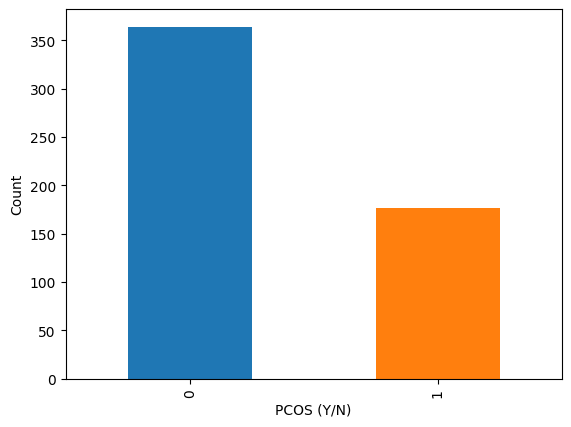

Blood Group
15    206
13    135
11    108
17     42
16     19
14     16
12     13
18      2
Name: Blood Group, dtype: int64


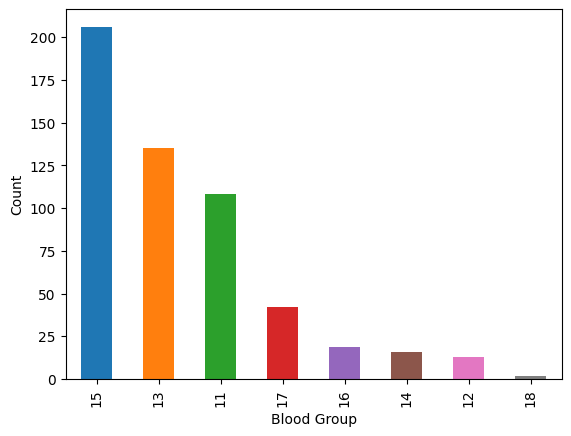

Pregnant(Y/N)
0    335
1    206
Name: Pregnant(Y/N), dtype: int64


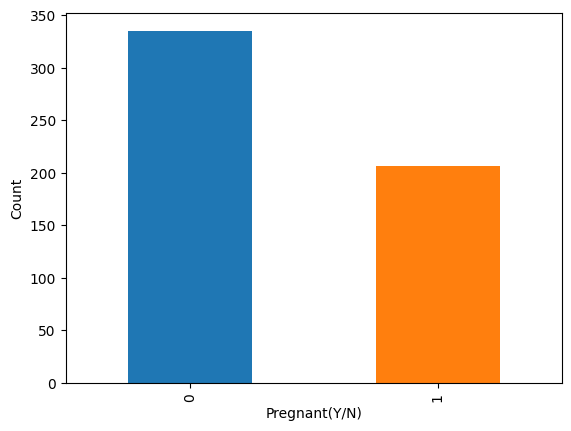

Weight gain(Y/N)
0    337
1    204
Name: Weight gain(Y/N), dtype: int64


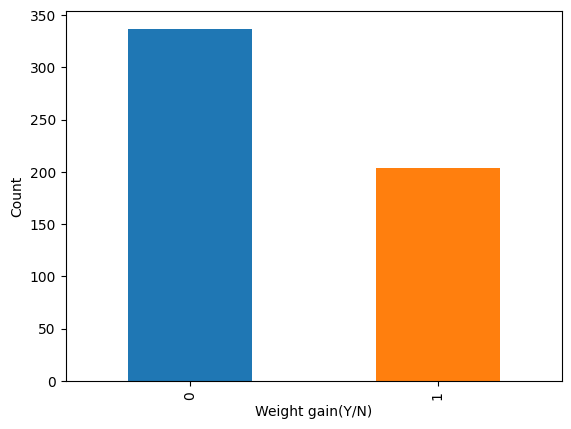

hair growth(Y/N)
0    393
1    148
Name: hair growth(Y/N), dtype: int64


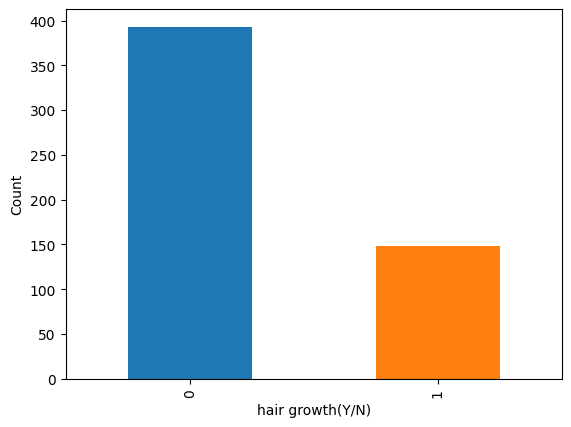

Skin darkening (Y/N)
0    375
1    166
Name: Skin darkening (Y/N), dtype: int64


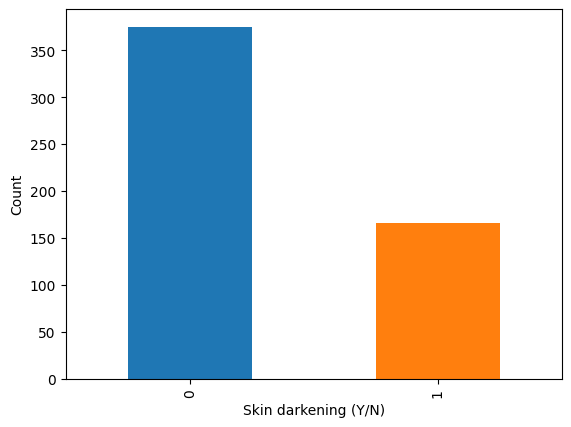

Hair loss(Y/N)
0    296
1    245
Name: Hair loss(Y/N), dtype: int64


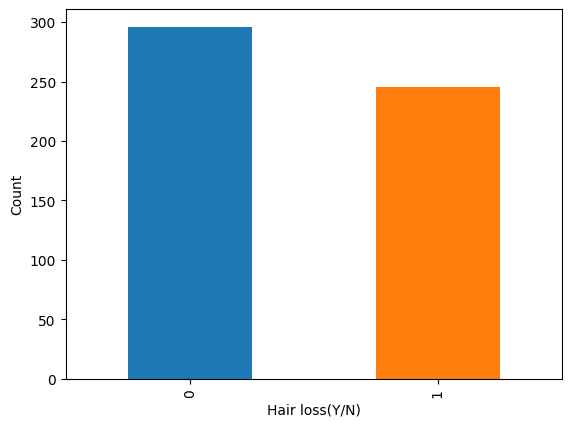

Pimples(Y/N)
0    276
1    265
Name: Pimples(Y/N), dtype: int64


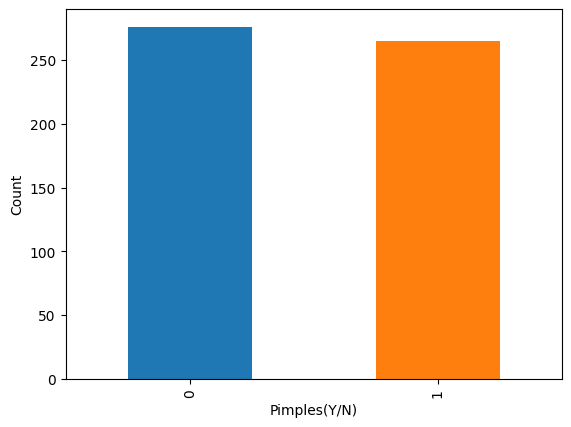

Fast food (Y/N)
1.0    278
0.0    262
Name: Fast food (Y/N), dtype: int64


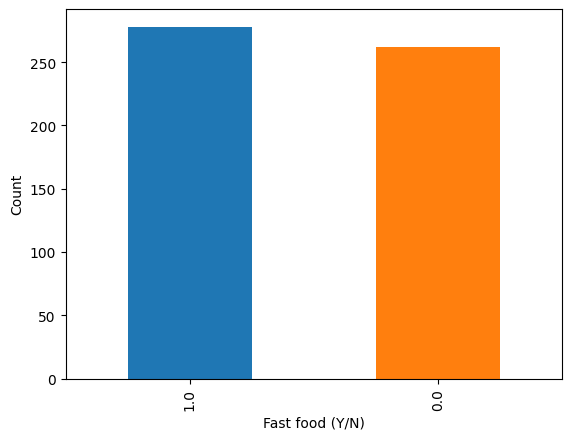

Reg.Exercise(Y/N)
0    407
1    134
Name: Reg.Exercise(Y/N), dtype: int64


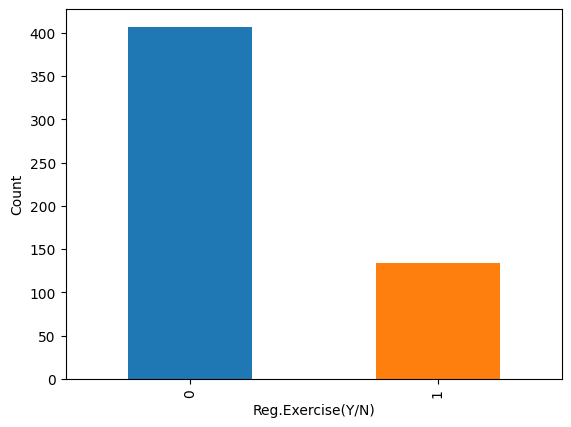

In [161]:
# Plotting all the categorical variables using bar plot
cv = ['PCOS (Y/N)','Blood Group','Pregnant(Y/N)','Weight gain(Y/N)','hair growth(Y/N)','Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)']

for i in cv:
  plt.xlabel(i)
  plt.ylabel('Count')
  c=pcos_dt[i].value_counts()
  print(i)
  print(c)
  colors = [('C'+str(j)) for j in range(len(c))]
  pcos_dt[i].value_counts().plot(kind='bar',color=colors)
  plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


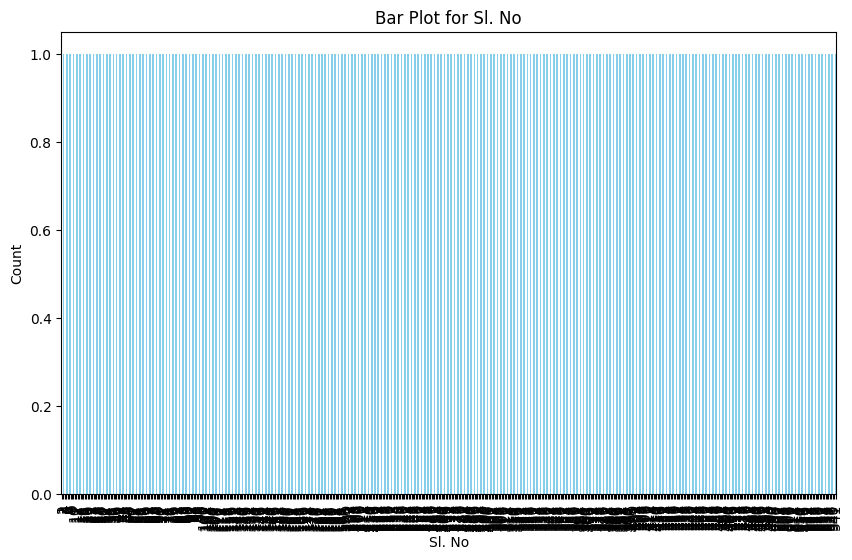

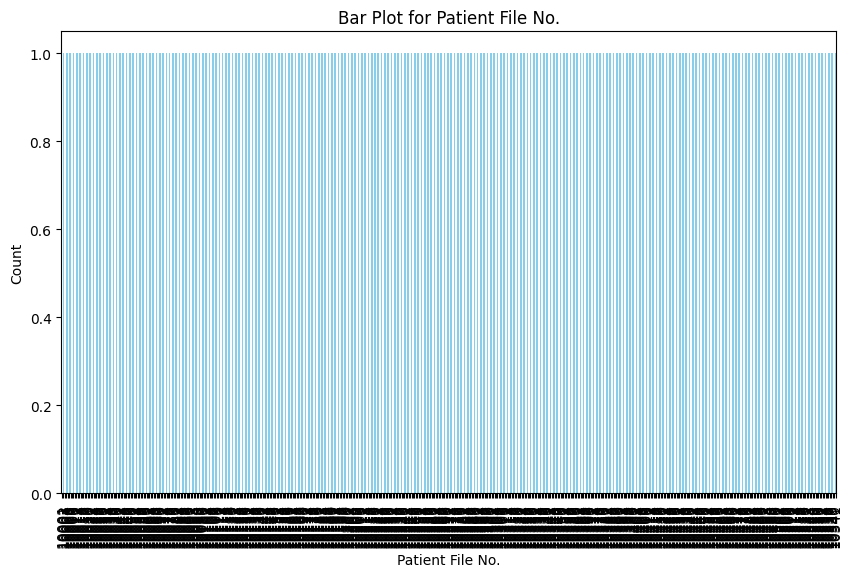

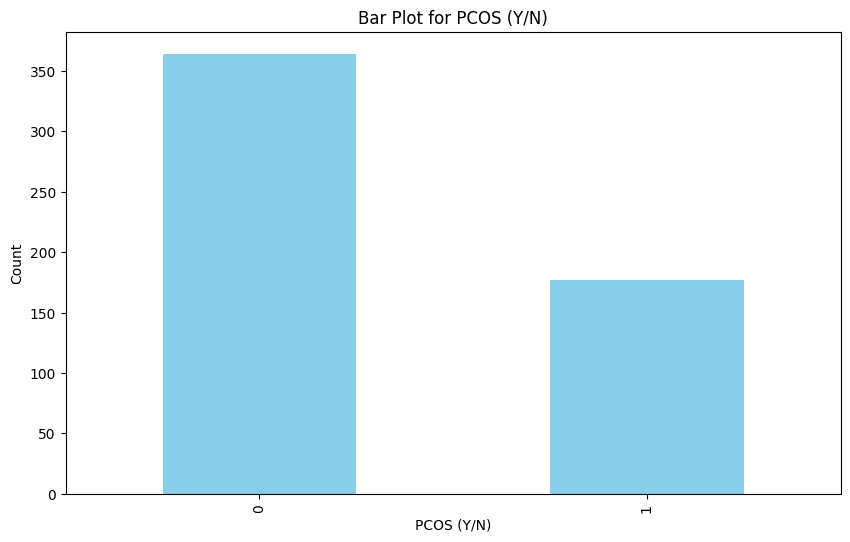

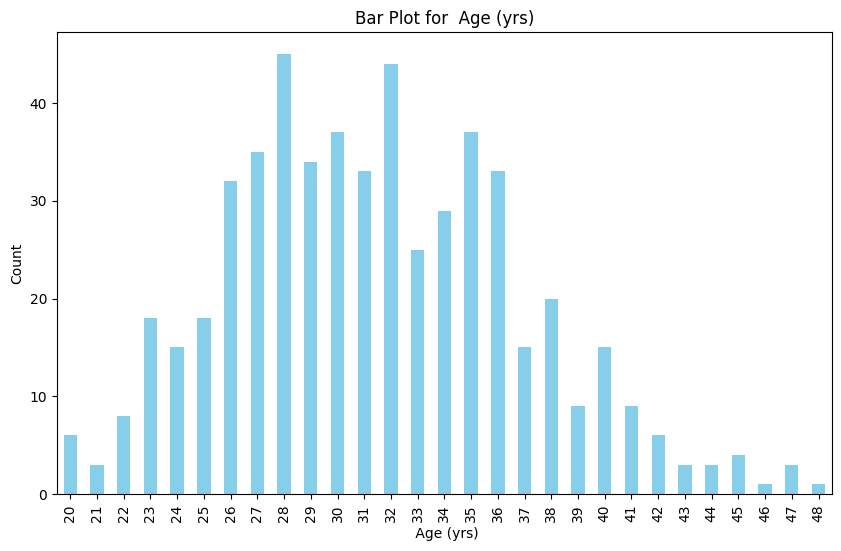

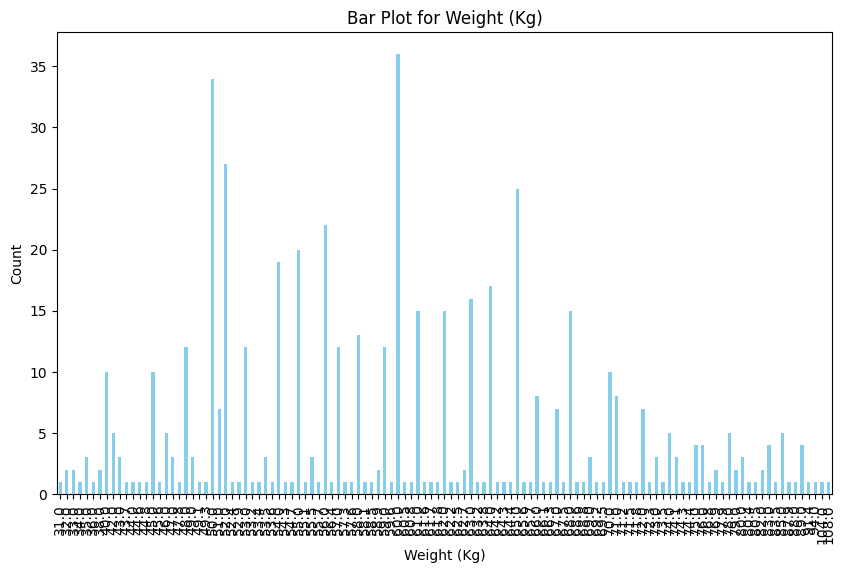

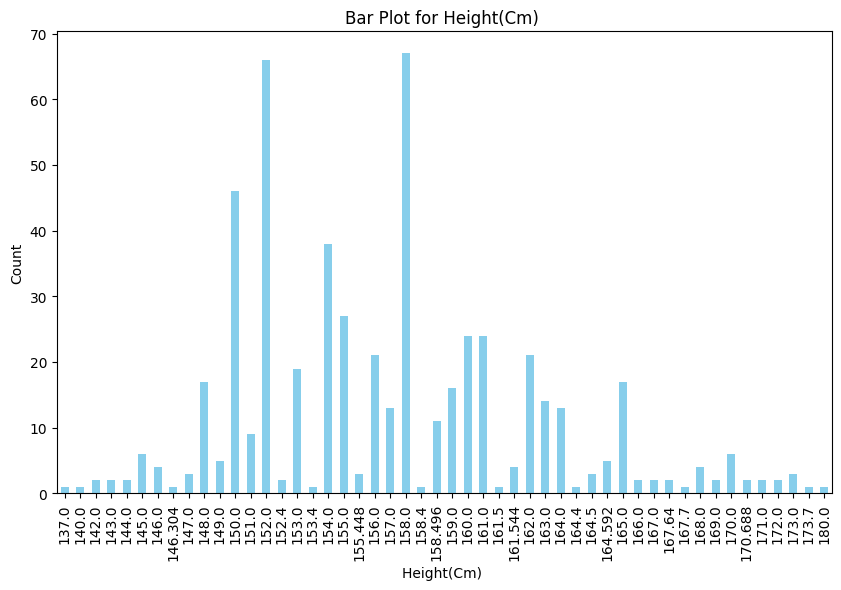

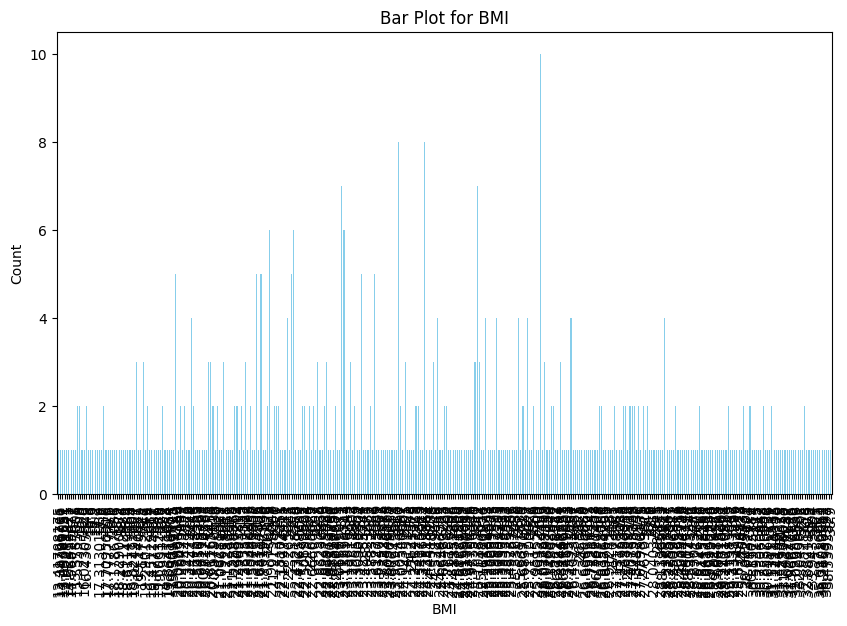

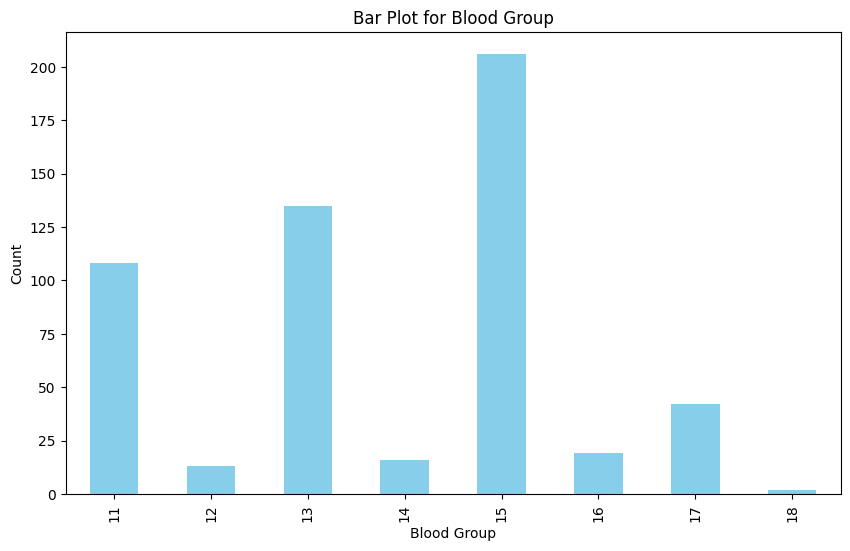

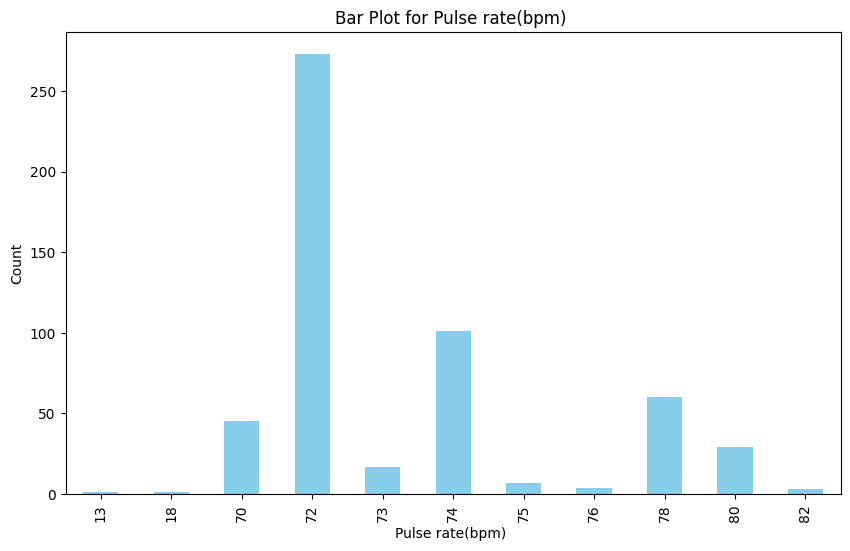

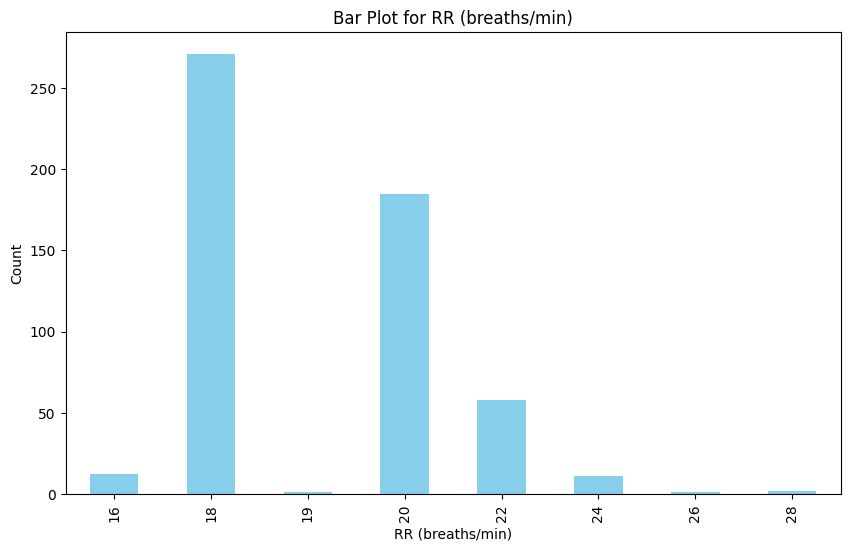

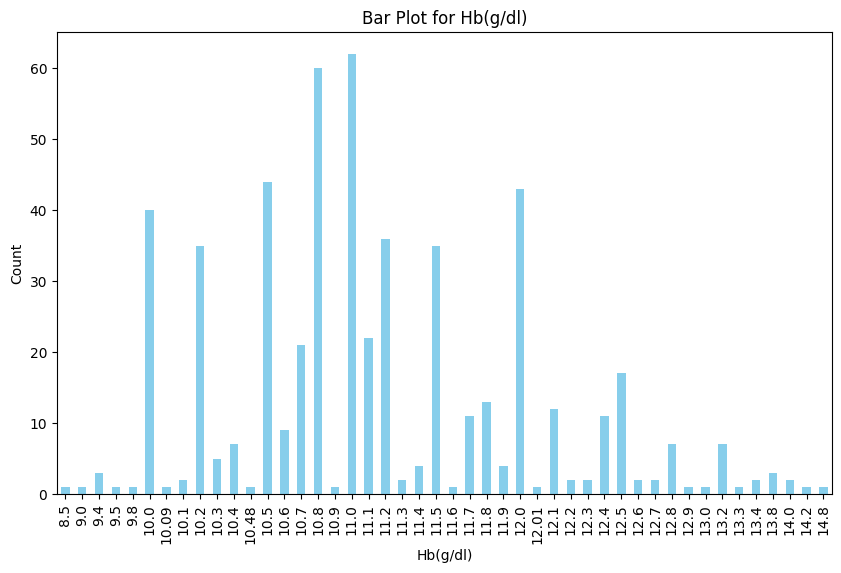

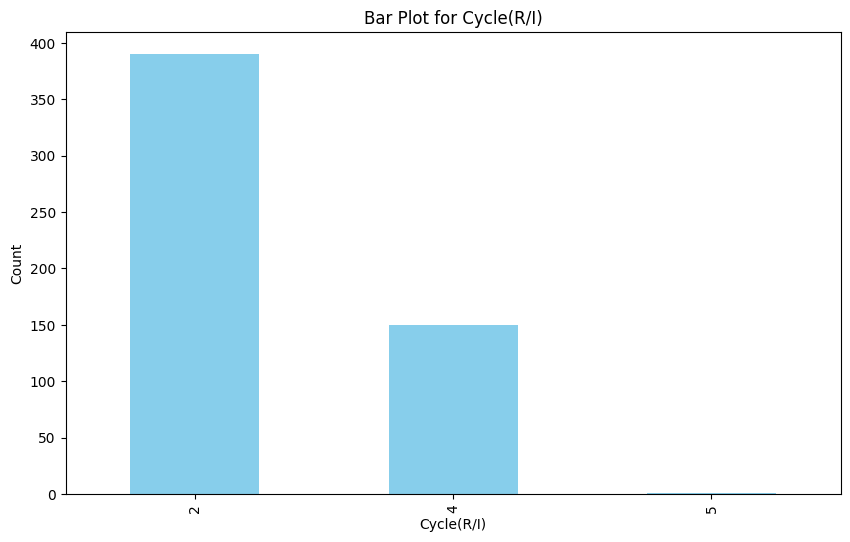

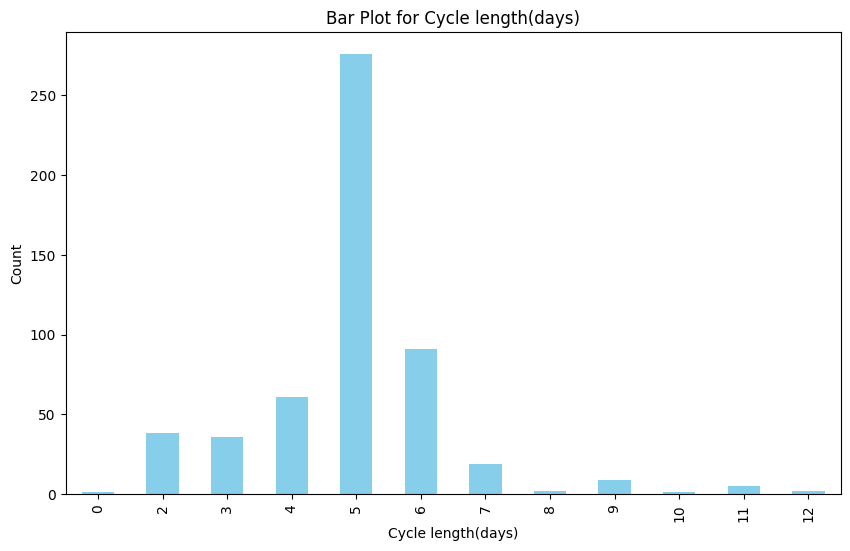

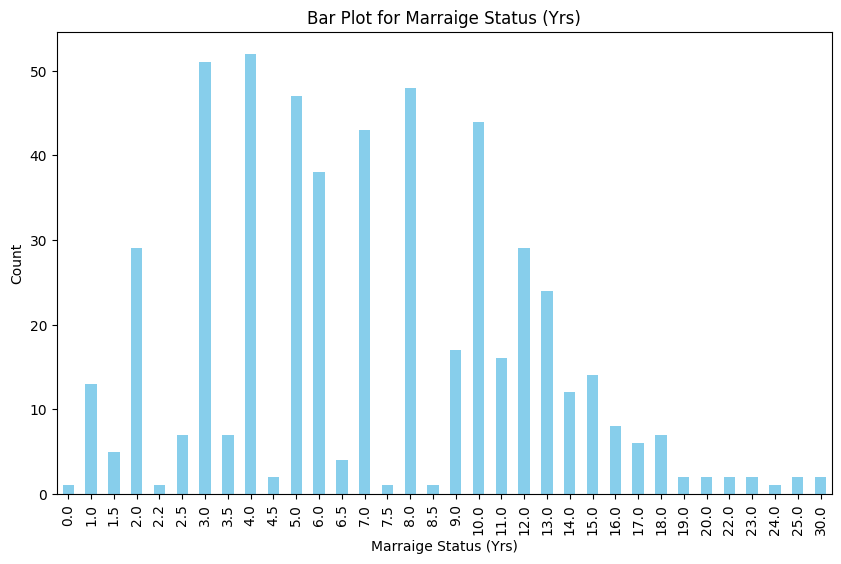

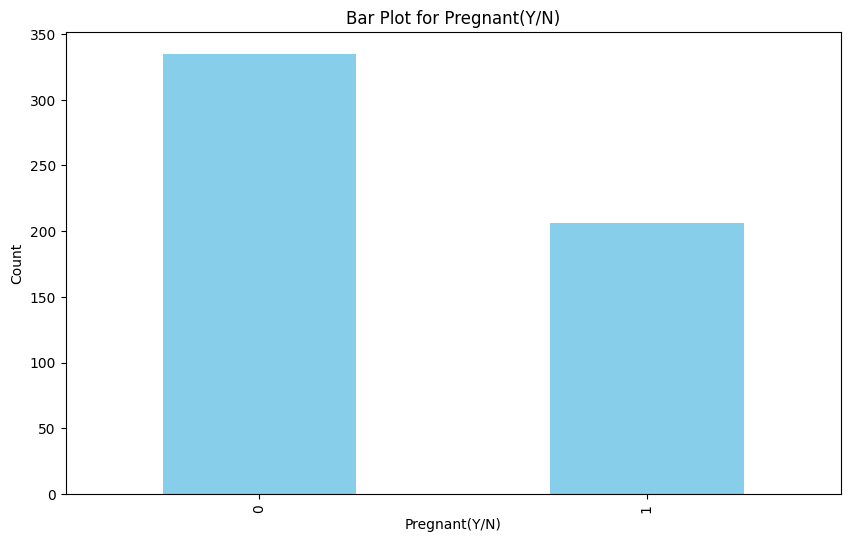

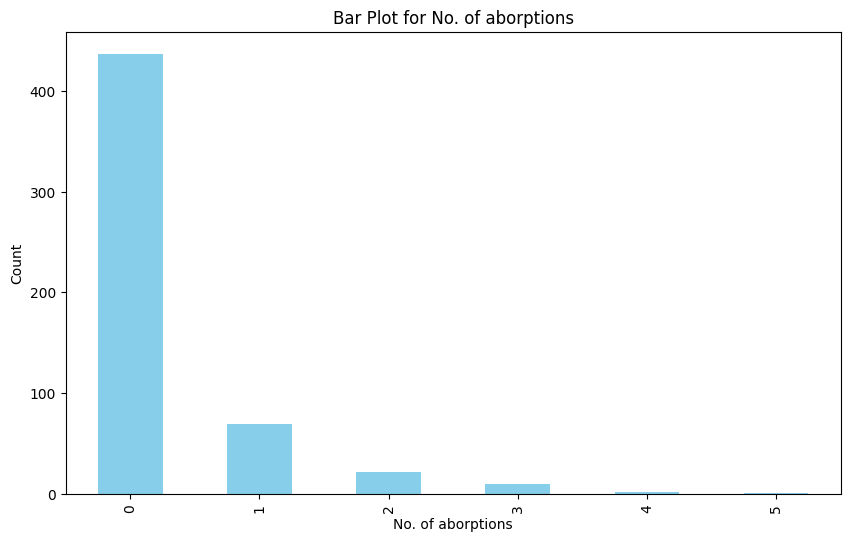

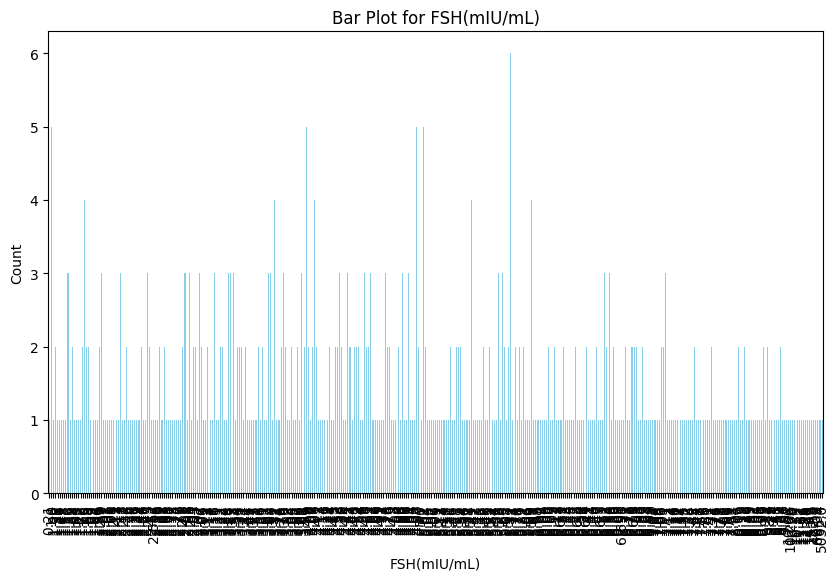

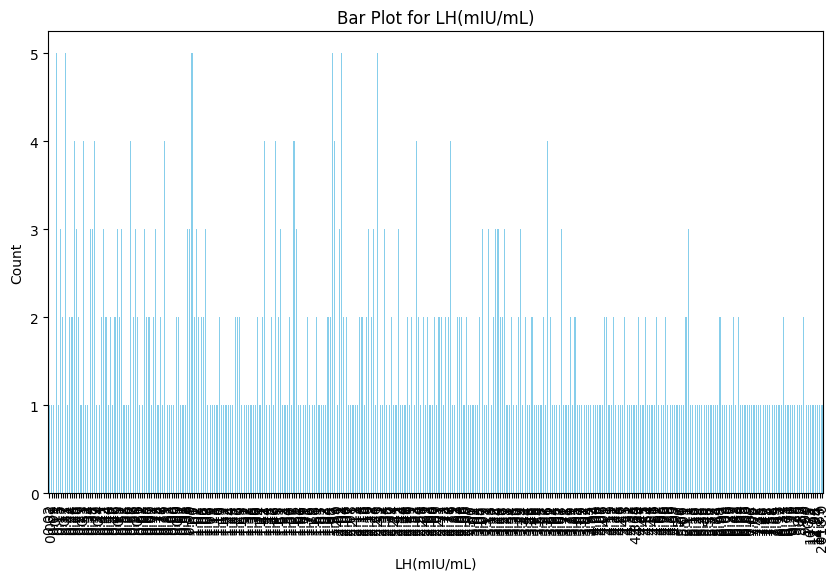

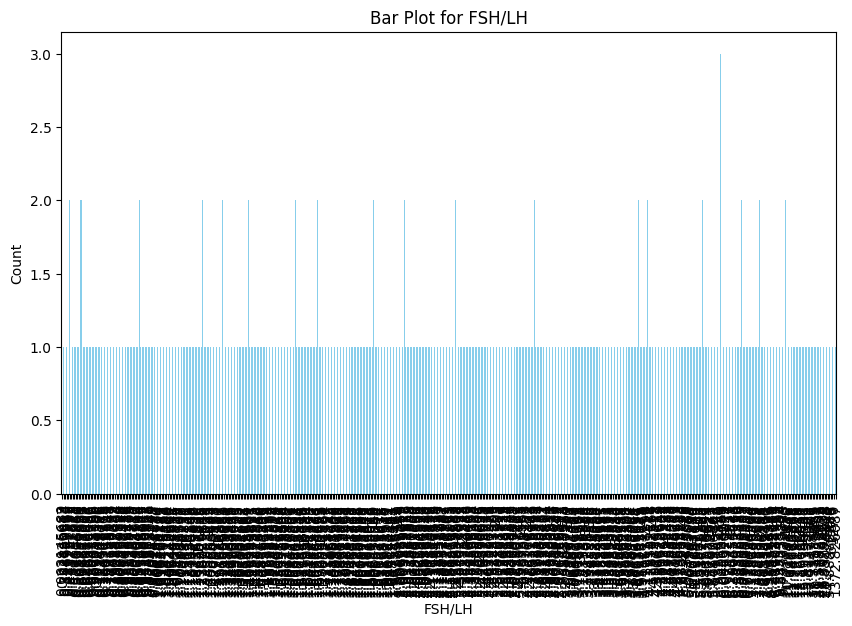

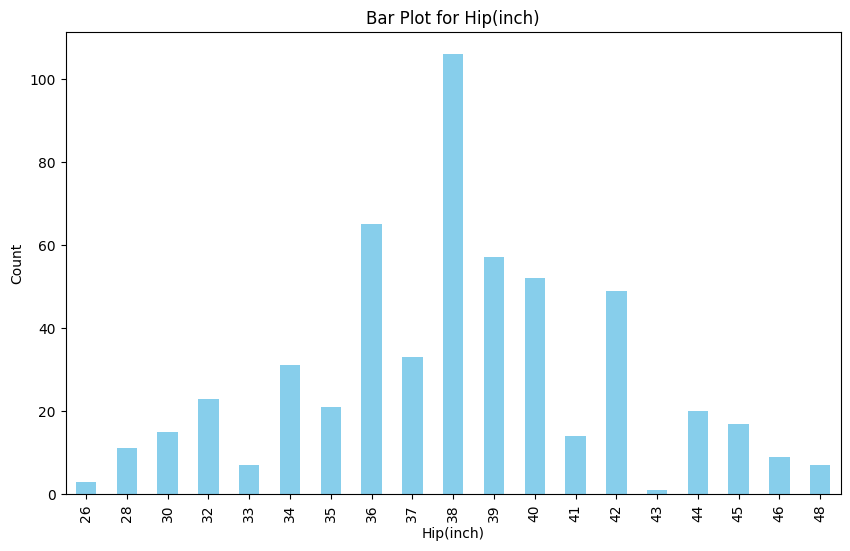

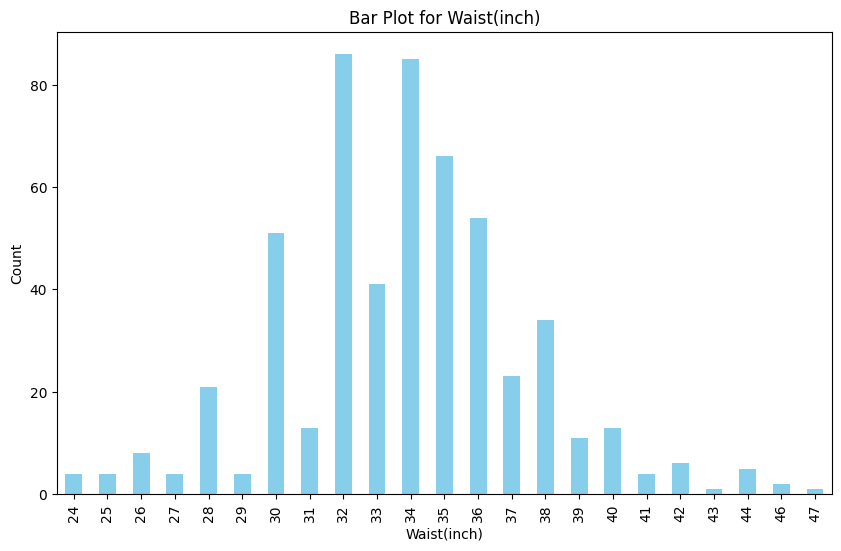

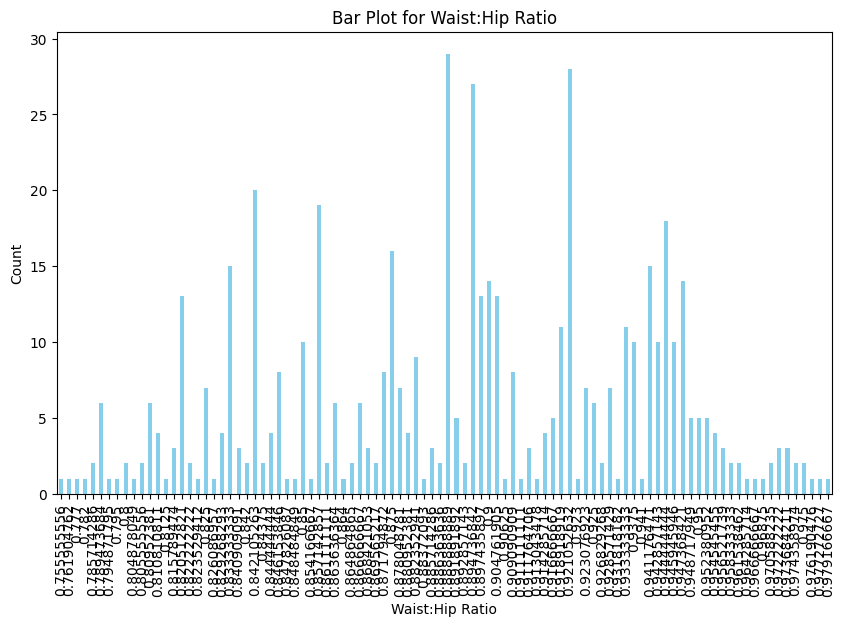

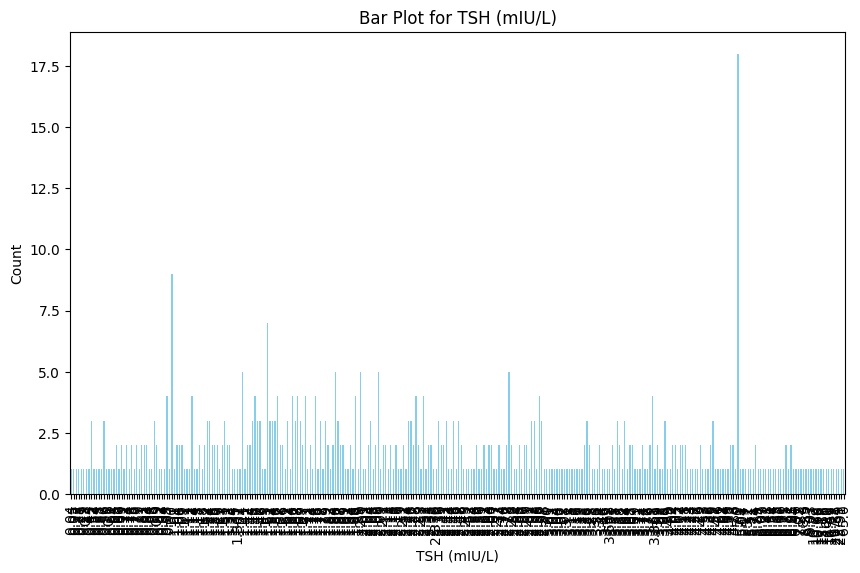

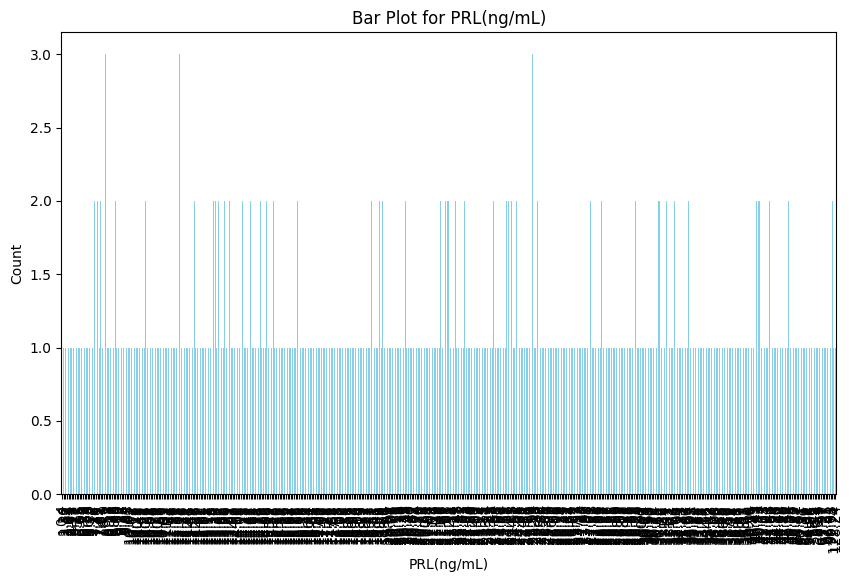

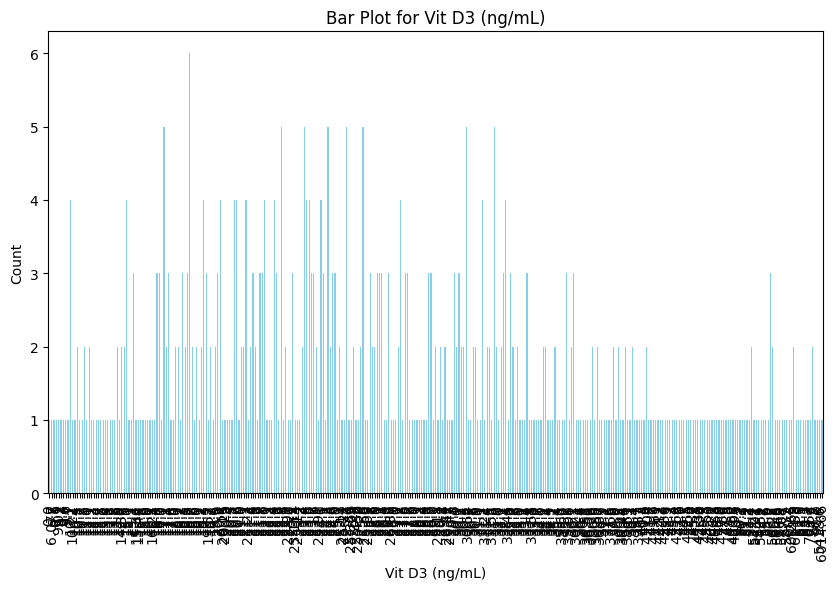

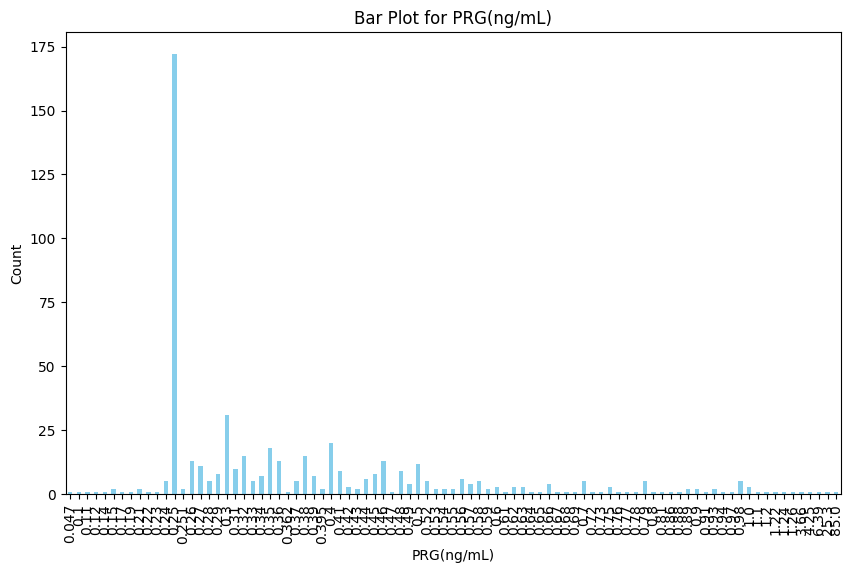

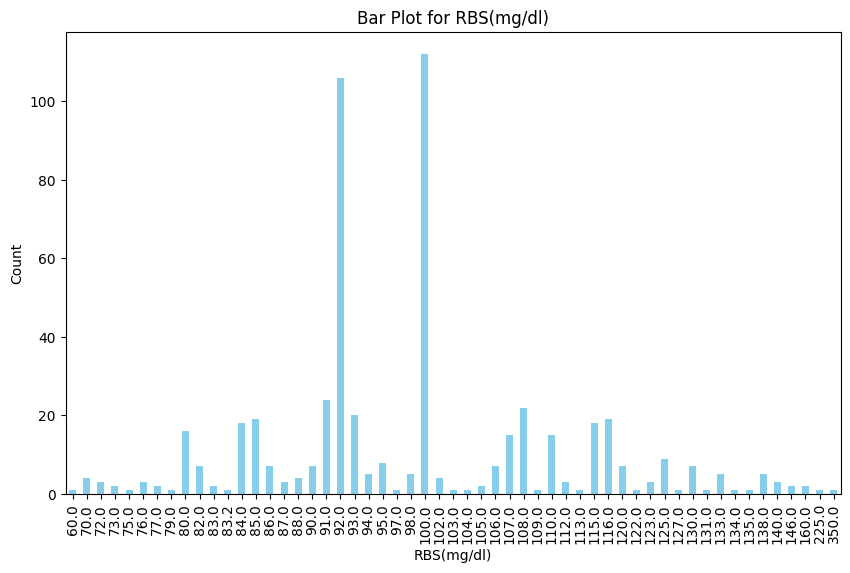

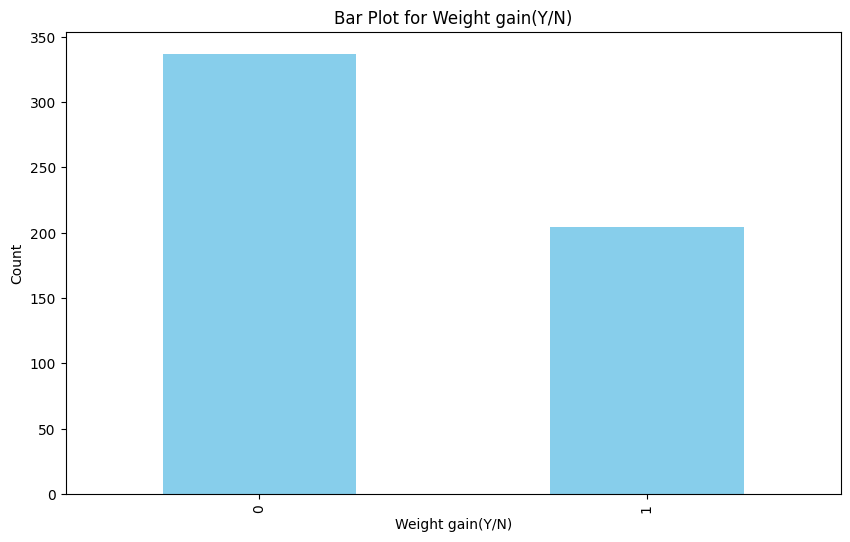

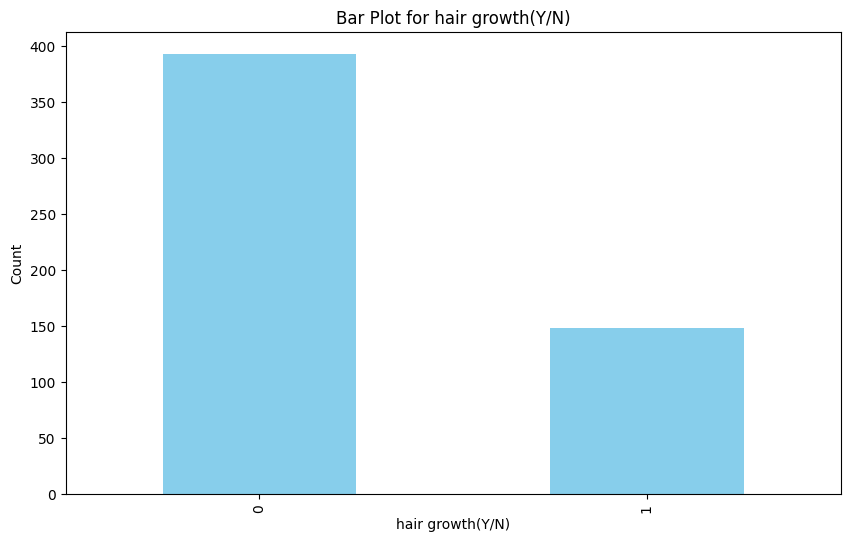

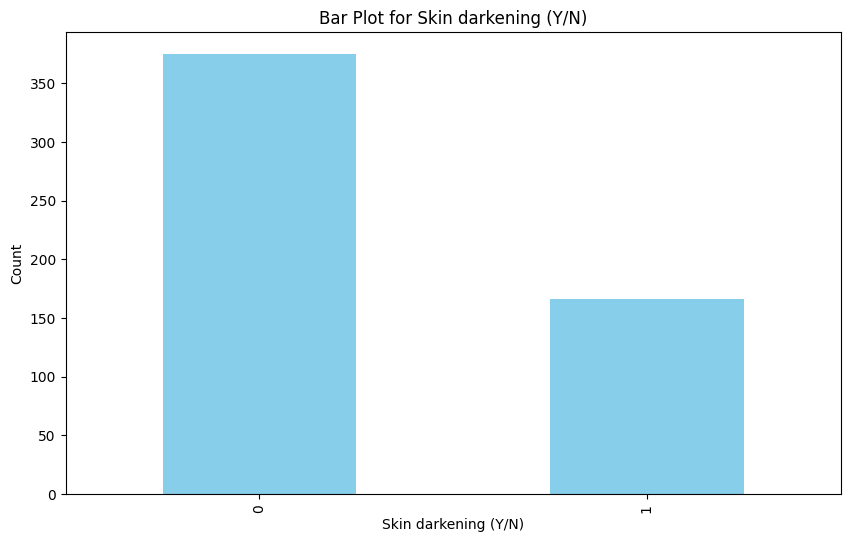

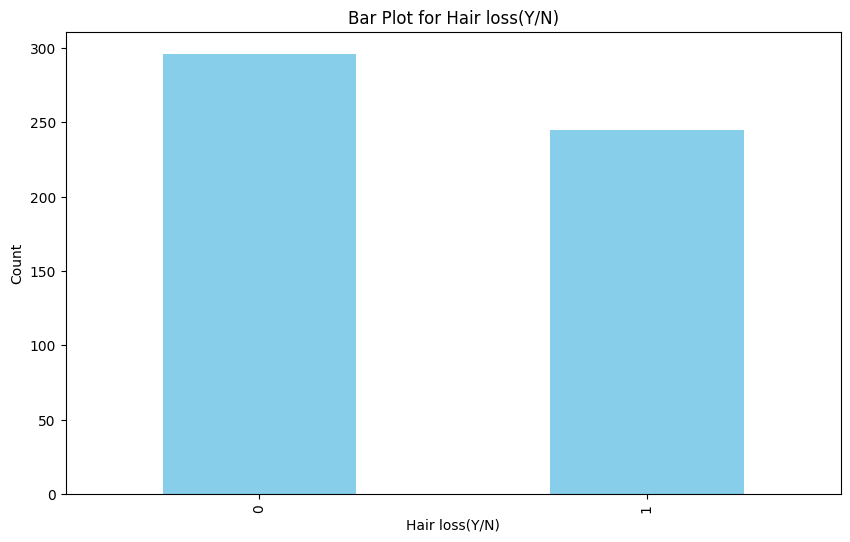

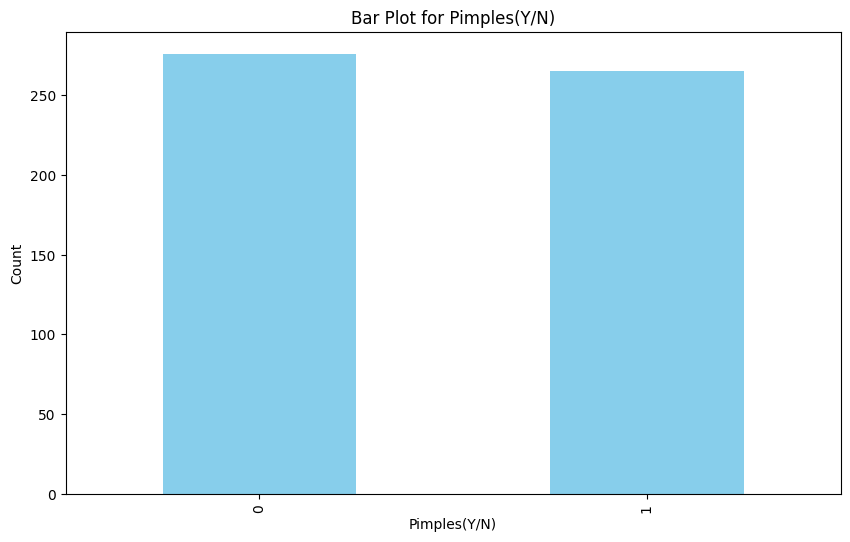

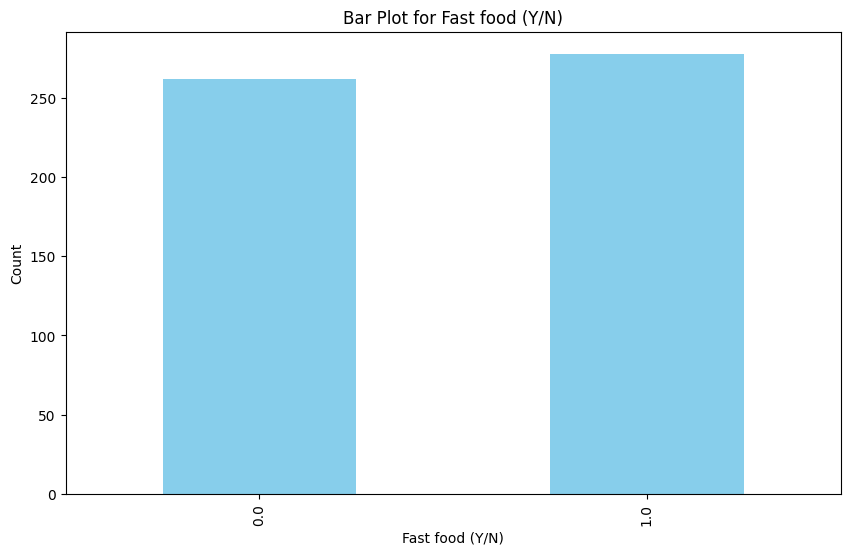

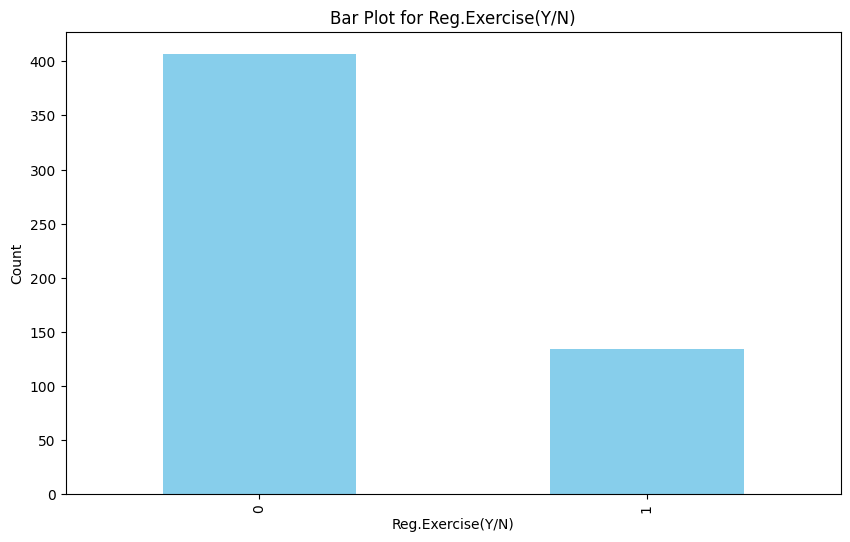

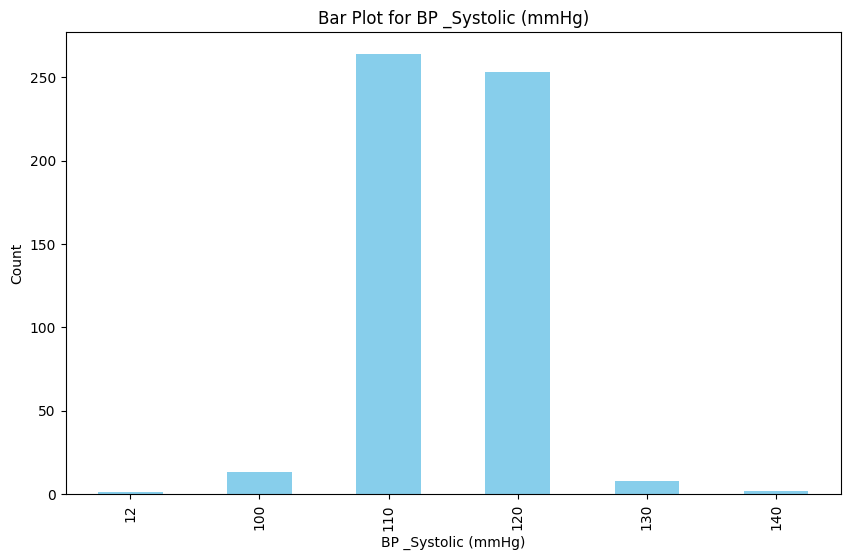

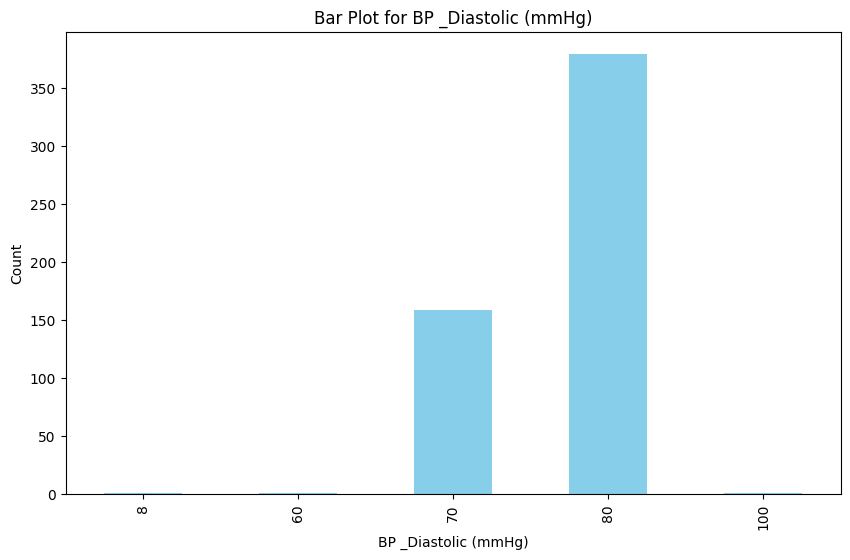

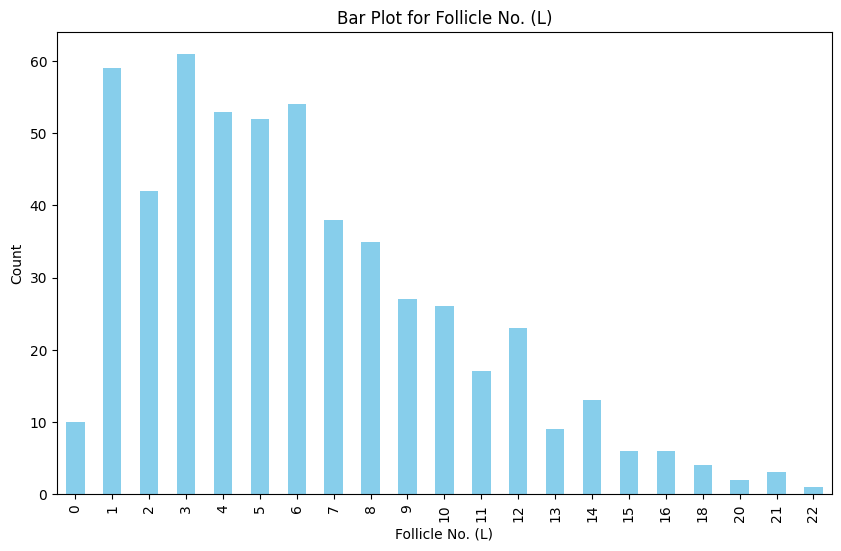

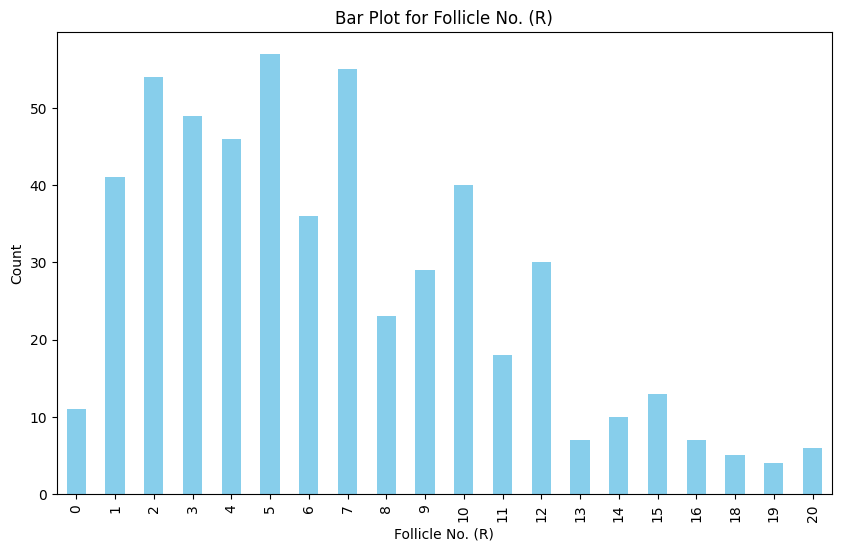

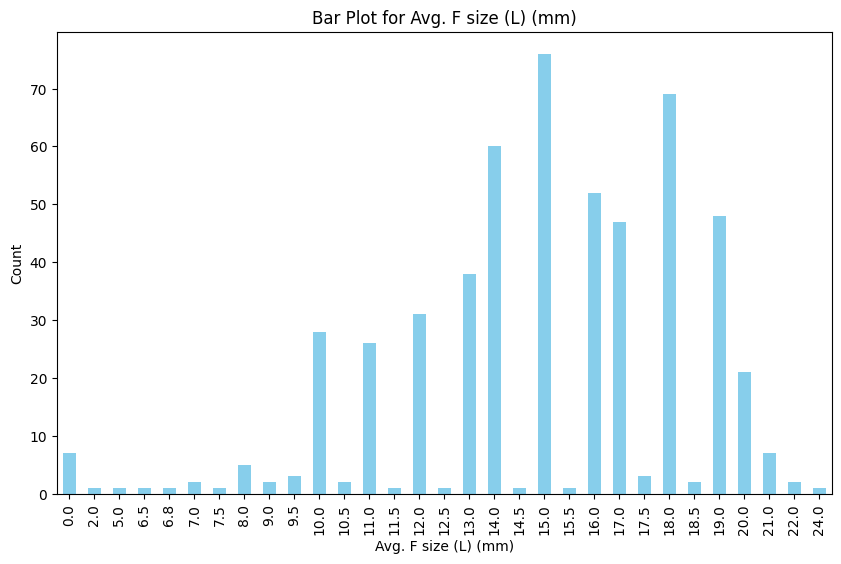

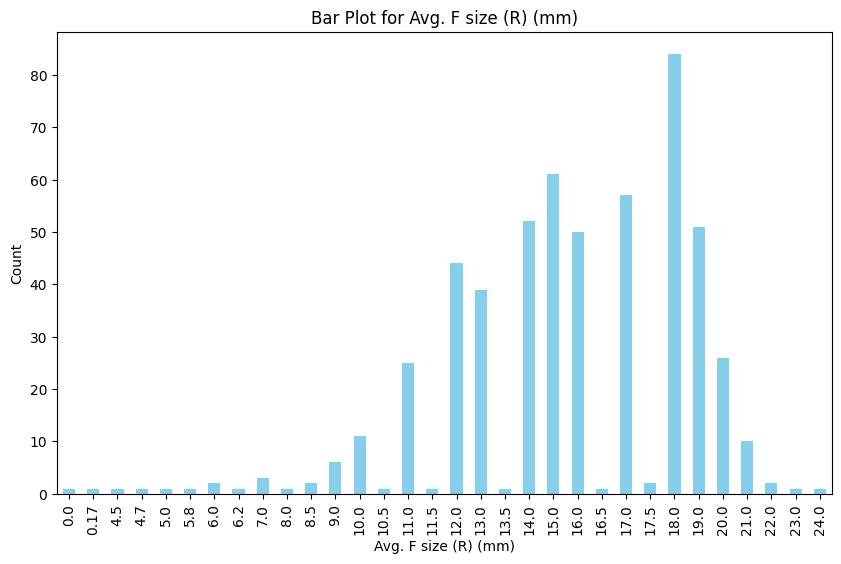

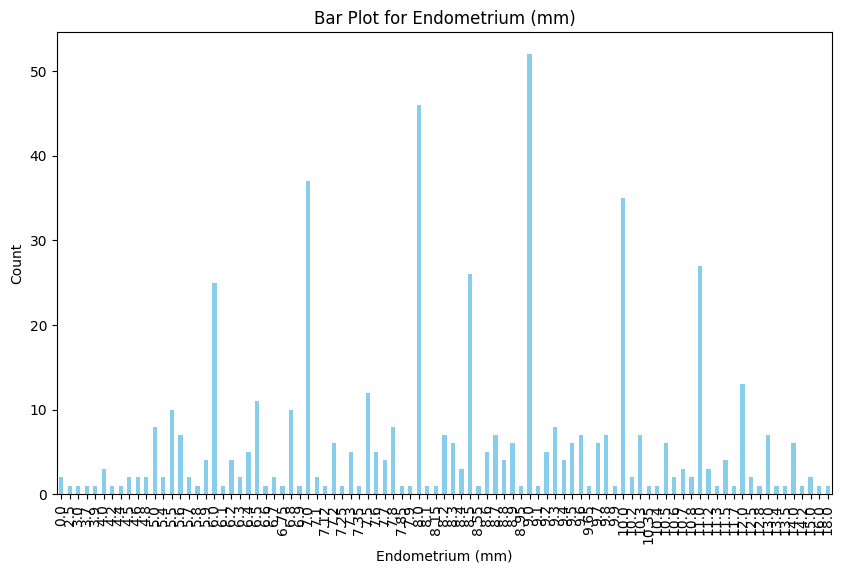

In [166]:
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Specify the full path to the CSV file
file_path = '/content/drive/MyDrive/Colab Notebooks/POC.csv'

# Read the CSV file
pcos_dt = pd.read_csv(file_path)

# Identify numerical columns
numeric_columns = pcos_dt.select_dtypes(include=['float64', 'int64']).columns

# Plot bar charts for each numerical column
for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    pcos_dt[column].value_counts().sort_index().plot(kind='bar', color='skyblue')
    plt.title(f'Bar Plot for {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()



# Feature Selection

Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)

Using correlation with heatmap to identify the important features

<ipython-input-167-75617772b3fa>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_mat = pcos_normalized_dt.corr()


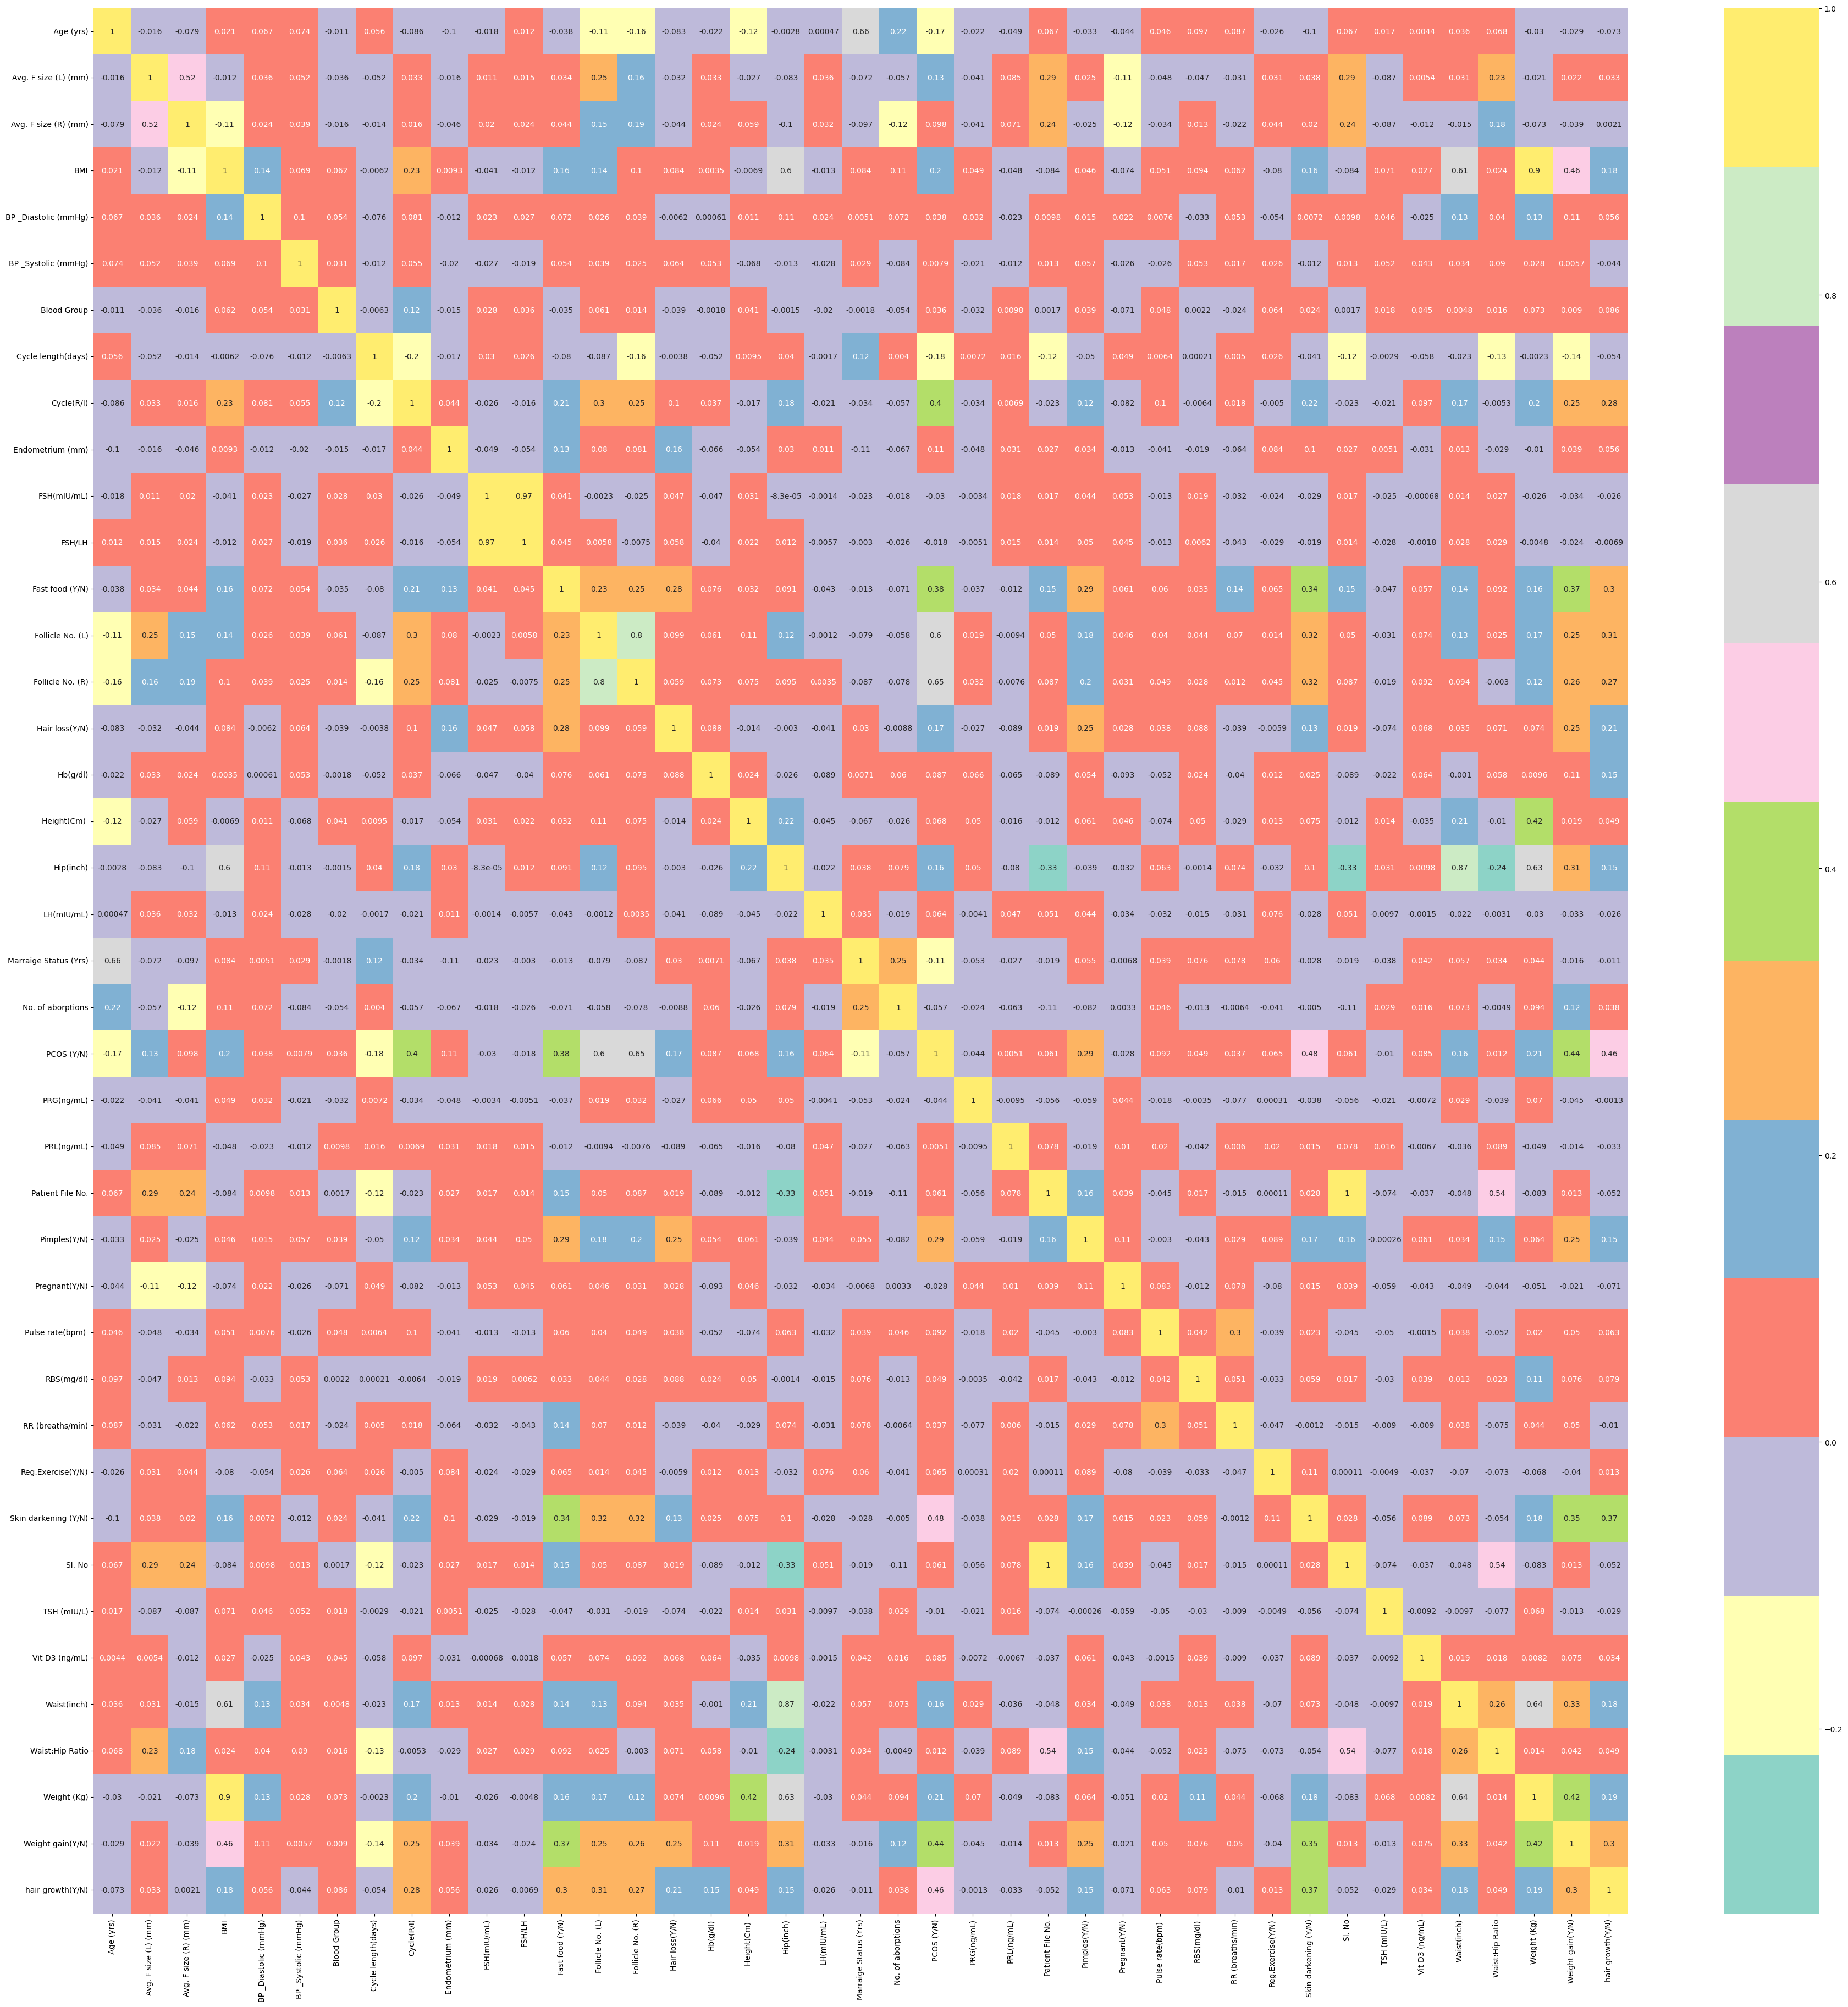

In [167]:
correlation_mat = pcos_normalized_dt.corr()

#get correlations of each features in dataset
feature_index = correlation_mat.index
plt.figure(figsize = (45,45))

#plot heat map
plot_heatmap = sns.heatmap(pcos_normalized_dt[feature_index].corr(),annot=True,cmap="Set3")


In [168]:
correlation_mat['PCOS (Y/N)'].sort_values(ascending=False)

PCOS (Y/N)               1.000000
Follicle No. (R)         0.648327
Follicle No. (L)         0.603346
Skin darkening (Y/N)     0.475733
hair growth(Y/N)         0.464667
Weight gain(Y/N)         0.441047
Cycle(R/I)               0.401644
Fast food (Y/N)          0.377933
Pimples(Y/N)             0.286077
Weight (Kg)              0.211938
BMI                      0.199534
Hair loss(Y/N)           0.172879
Waist(inch)              0.164598
Hip(inch)                0.162297
Avg. F size (L) (mm)     0.132992
Endometrium (mm)         0.106648
Avg. F size (R) (mm)     0.097690
Pulse rate(bpm)          0.091821
Hb(g/dl)                 0.087170
Vit D3 (ng/mL)           0.085494
Height(Cm)               0.068254
Reg.Exercise(Y/N)        0.065337
LH(mIU/mL)               0.063879
Patient File No.         0.060998
Sl. No                   0.060998
RBS(mg/dl)               0.048922
BP _Diastolic (mmHg)     0.038032
RR (breaths/min)         0.036928
Blood Group              0.036433
Waist:Hip Rati

Selecting the top 15 features with highest p-value

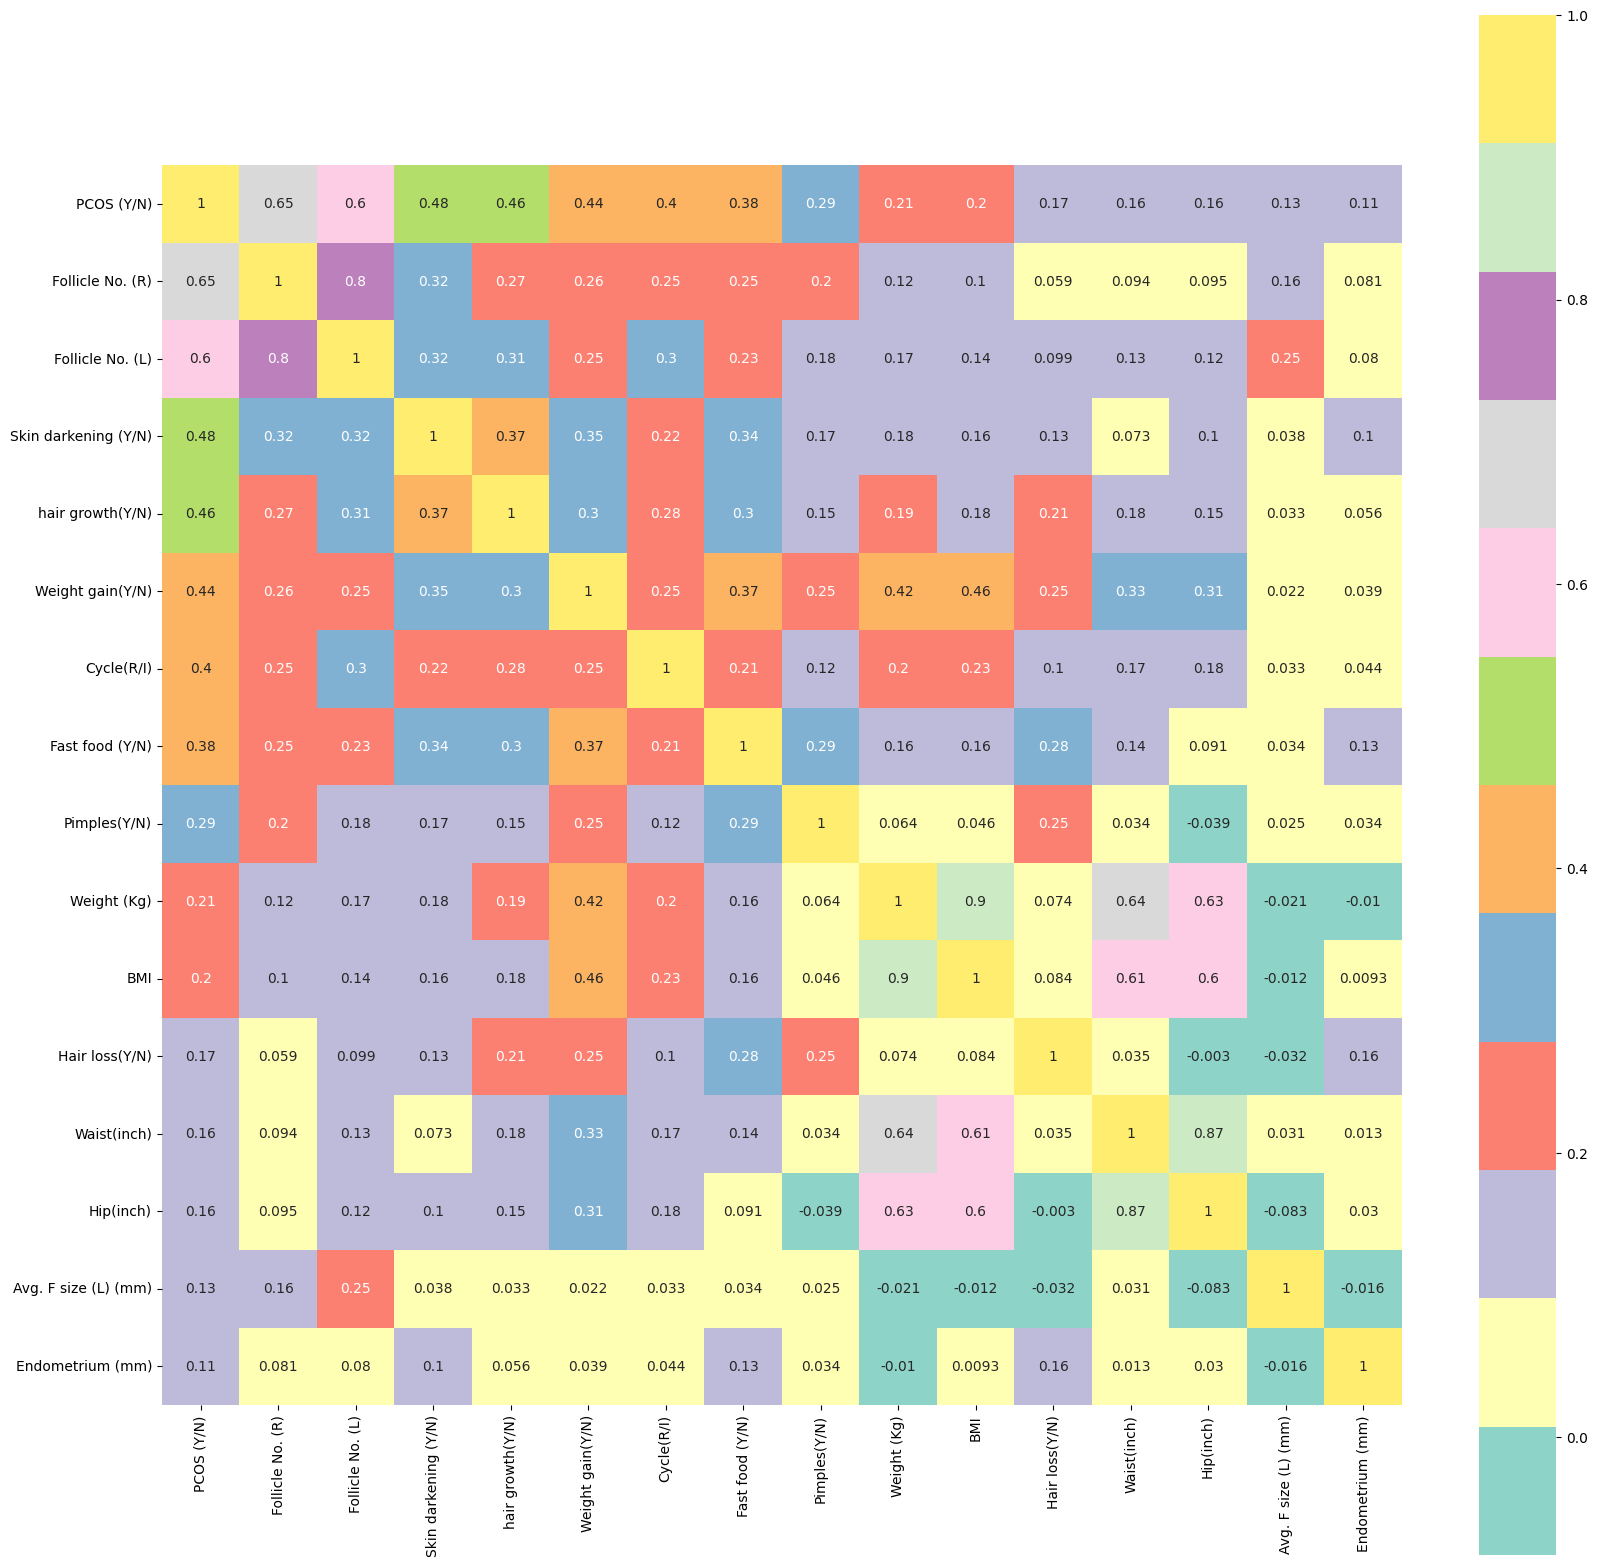

In [169]:
imp_features = correlation_mat.nlargest(16,'PCOS (Y/N)')['PCOS (Y/N)'].index
plt.figure(figsize = (20,20))
plot_heat_map_after = sns.heatmap(pcos_normalized_dt[imp_features].corr(),annot=True,square=True,
                                  cmap="Set3",annot_kws={'size':10})


In [170]:
correlation_mat.nlargest(16,'PCOS (Y/N)')['PCOS (Y/N)']

PCOS (Y/N)              1.000000
Follicle No. (R)        0.648327
Follicle No. (L)        0.603346
Skin darkening (Y/N)    0.475733
hair growth(Y/N)        0.464667
Weight gain(Y/N)        0.441047
Cycle(R/I)              0.401644
Fast food (Y/N)         0.377933
Pimples(Y/N)            0.286077
Weight (Kg)             0.211938
BMI                     0.199534
Hair loss(Y/N)          0.172879
Waist(inch)             0.164598
Hip(inch)               0.162297
Avg. F size (L) (mm)    0.132992
Endometrium (mm)        0.106648
Name: PCOS (Y/N), dtype: float64

In [171]:
imp_features

Index(['PCOS (Y/N)', 'Follicle No. (R)', 'Follicle No. (L)',
       'Skin darkening (Y/N)', 'hair growth(Y/N)', 'Weight gain(Y/N)',
       'Cycle(R/I)', 'Fast food (Y/N)', 'Pimples(Y/N)', 'Weight (Kg)', 'BMI',
       'Hair loss(Y/N)', 'Waist(inch)', 'Hip(inch)', 'Avg. F size (L) (mm)',
       'Endometrium (mm)'],
      dtype='object')

In [172]:
pcos_df = pcos_normalized_dt[imp_features]

In [173]:
pcos_df.head()
# pcos_df.shape

,PCOS (Y/N),Follicle No. (R),Follicle No. (L),Skin darkening (Y/N),hair growth(Y/N),Weight gain(Y/N),Cycle(R/I),Fast food (Y/N),Pimples(Y/N),Weight (Kg),BMI,Hair loss(Y/N),Waist(inch),Hip(inch),Avg. F size (L) (mm),Endometrium (mm)
0,0.0,0.15,0.136364,0.0,0.0,0.0,0.0,1.0,0.0,0.176623,0.259878,0.0,0.260870,0.454545,0.750000,0.472222
1,0.0,0.25,0.136364,0.0,0.0,0.0,0.0,0.0,0.0,0.441558,0.472141,0.0,0.347826,0.545455,0.625000,0.205556
2,1.0,0.75,0.590909,0.0,0.0,0.0,0.0,1.0,1.0,0.490909,0.485347,1.0,0.521739,0.636364,0.750000,0.555556
3,0.0,0.10,0.090909,0.0,0.0,0.0,0.0,0.0,0.0,0.441558,0.651650,0.0,0.521739,0.727273,0.625000,0.416667
4,0.0,0.20,0.136364,0.0,0.0,0.0,0.0,0.0,0.0,0.272727,0.288613,1.0,0.260870,0.500000,0.666667,0.388889


# Model

## Dataset splitting

Splitting dataset into training, validation, and test sets.

In [174]:
X = pcos_df.iloc[:,1:].values
y = pcos_df.iloc[:,0].values

In [175]:
print(X.shape)
print(y.shape)

(541, 15)
(541,)


In [176]:
X_train,X_test,y_train,y_test = train_test_split(X, y,test_size=0.3,random_state=189)
X_val,X_test,y_val,y_test = train_test_split(X_test, y_test,test_size=0.3,random_state=189)

## 1. Decision Tree

In [177]:
depths = [5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,110,120,130,140,150,160,170,180,200]
ac=[]

In [190]:
print(np.isnan(X_train).any(), np.isnan(X_val).any())


False False


In [181]:
from sklearn.impute import SimpleImputer

# Create an imputer instance
imputer = SimpleImputer(strategy='mean')  # You can choose other strategies like 'median' or 'most_frequent'

# Fit the imputer on X_train and transform X_train
X_train_imputed = imputer.fit_transform(X_train)

# Apply the same imputer to X_val
X_val_imputed = imputer.transform(X_val)


In [184]:
# Find indices of rows without NaN in X_train
valid_indices_train = ~np.isnan(X_train).any(axis=1)

# Apply boolean indexing to X_train and y_train
X_train = X_train[valid_indices_train]
y_train = y_train[valid_indices_train]

# Find indices of rows without NaN in X_val
valid_indices_val = ~np.isnan(X_val).any(axis=1)

# Apply boolean indexing to X_val and y_val
X_val = X_val[valid_indices_val]
y_val = y_val[valid_indices_val]


In [185]:
# Drop rows with missing values in both X_train and X_val
X_train = X_train.dropna()
y_train = y_train[X_train.index]  # Adjust y_train accordingly
X_val = X_val.dropna()
y_val = y_val[X_val.index]  # Adjust y_val accordingly


AttributeError: 'numpy.ndarray' object has no attribute 'dropna'

In [191]:
for i in depths:
  dtree_clf = tree.DecisionTreeClassifier(max_depth=i,min_samples_leaf=4)
  dtree_clf.fit(X_train,y_train)
  y_pred_dtree = dtree_clf.predict(X_val)
  ac.append(accuracy_score(y_val,y_pred_dtree)*100)


In [188]:
print(len(depths), len(ac))


29 0


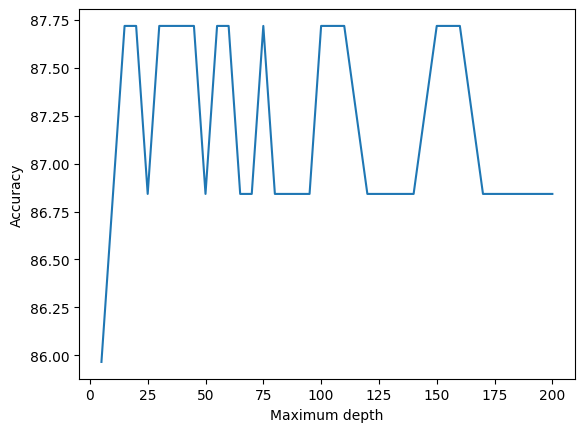

In [192]:
plt.plot(depths,ac,label='Test_accuracy')
plt.xlabel('Maximum depth')
plt.ylabel('Accuracy')
plt.show()

In [193]:
#Finding the depth for which Accuracy is maximum

max_acc = max(ac)
max_dt = depths[ac.index(max_acc)]
print(max_acc, max_dt)

87.71929824561403 15


In [194]:
#Using the depth which gave the maximum a15,ccuracy to train the model
dtree_clf = tree.DecisionTreeClassifier(max_depth=max_dt,min_samples_leaf=4)
dtree_clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=15, min_samples_leaf=4)

In [195]:
y_pred_dtree = dtree_clf.predict(X_val)

In [196]:
acc_dtree = accuracy_score(y_val,y_pred_dtree)
print(acc_dtree)

0.8771929824561403


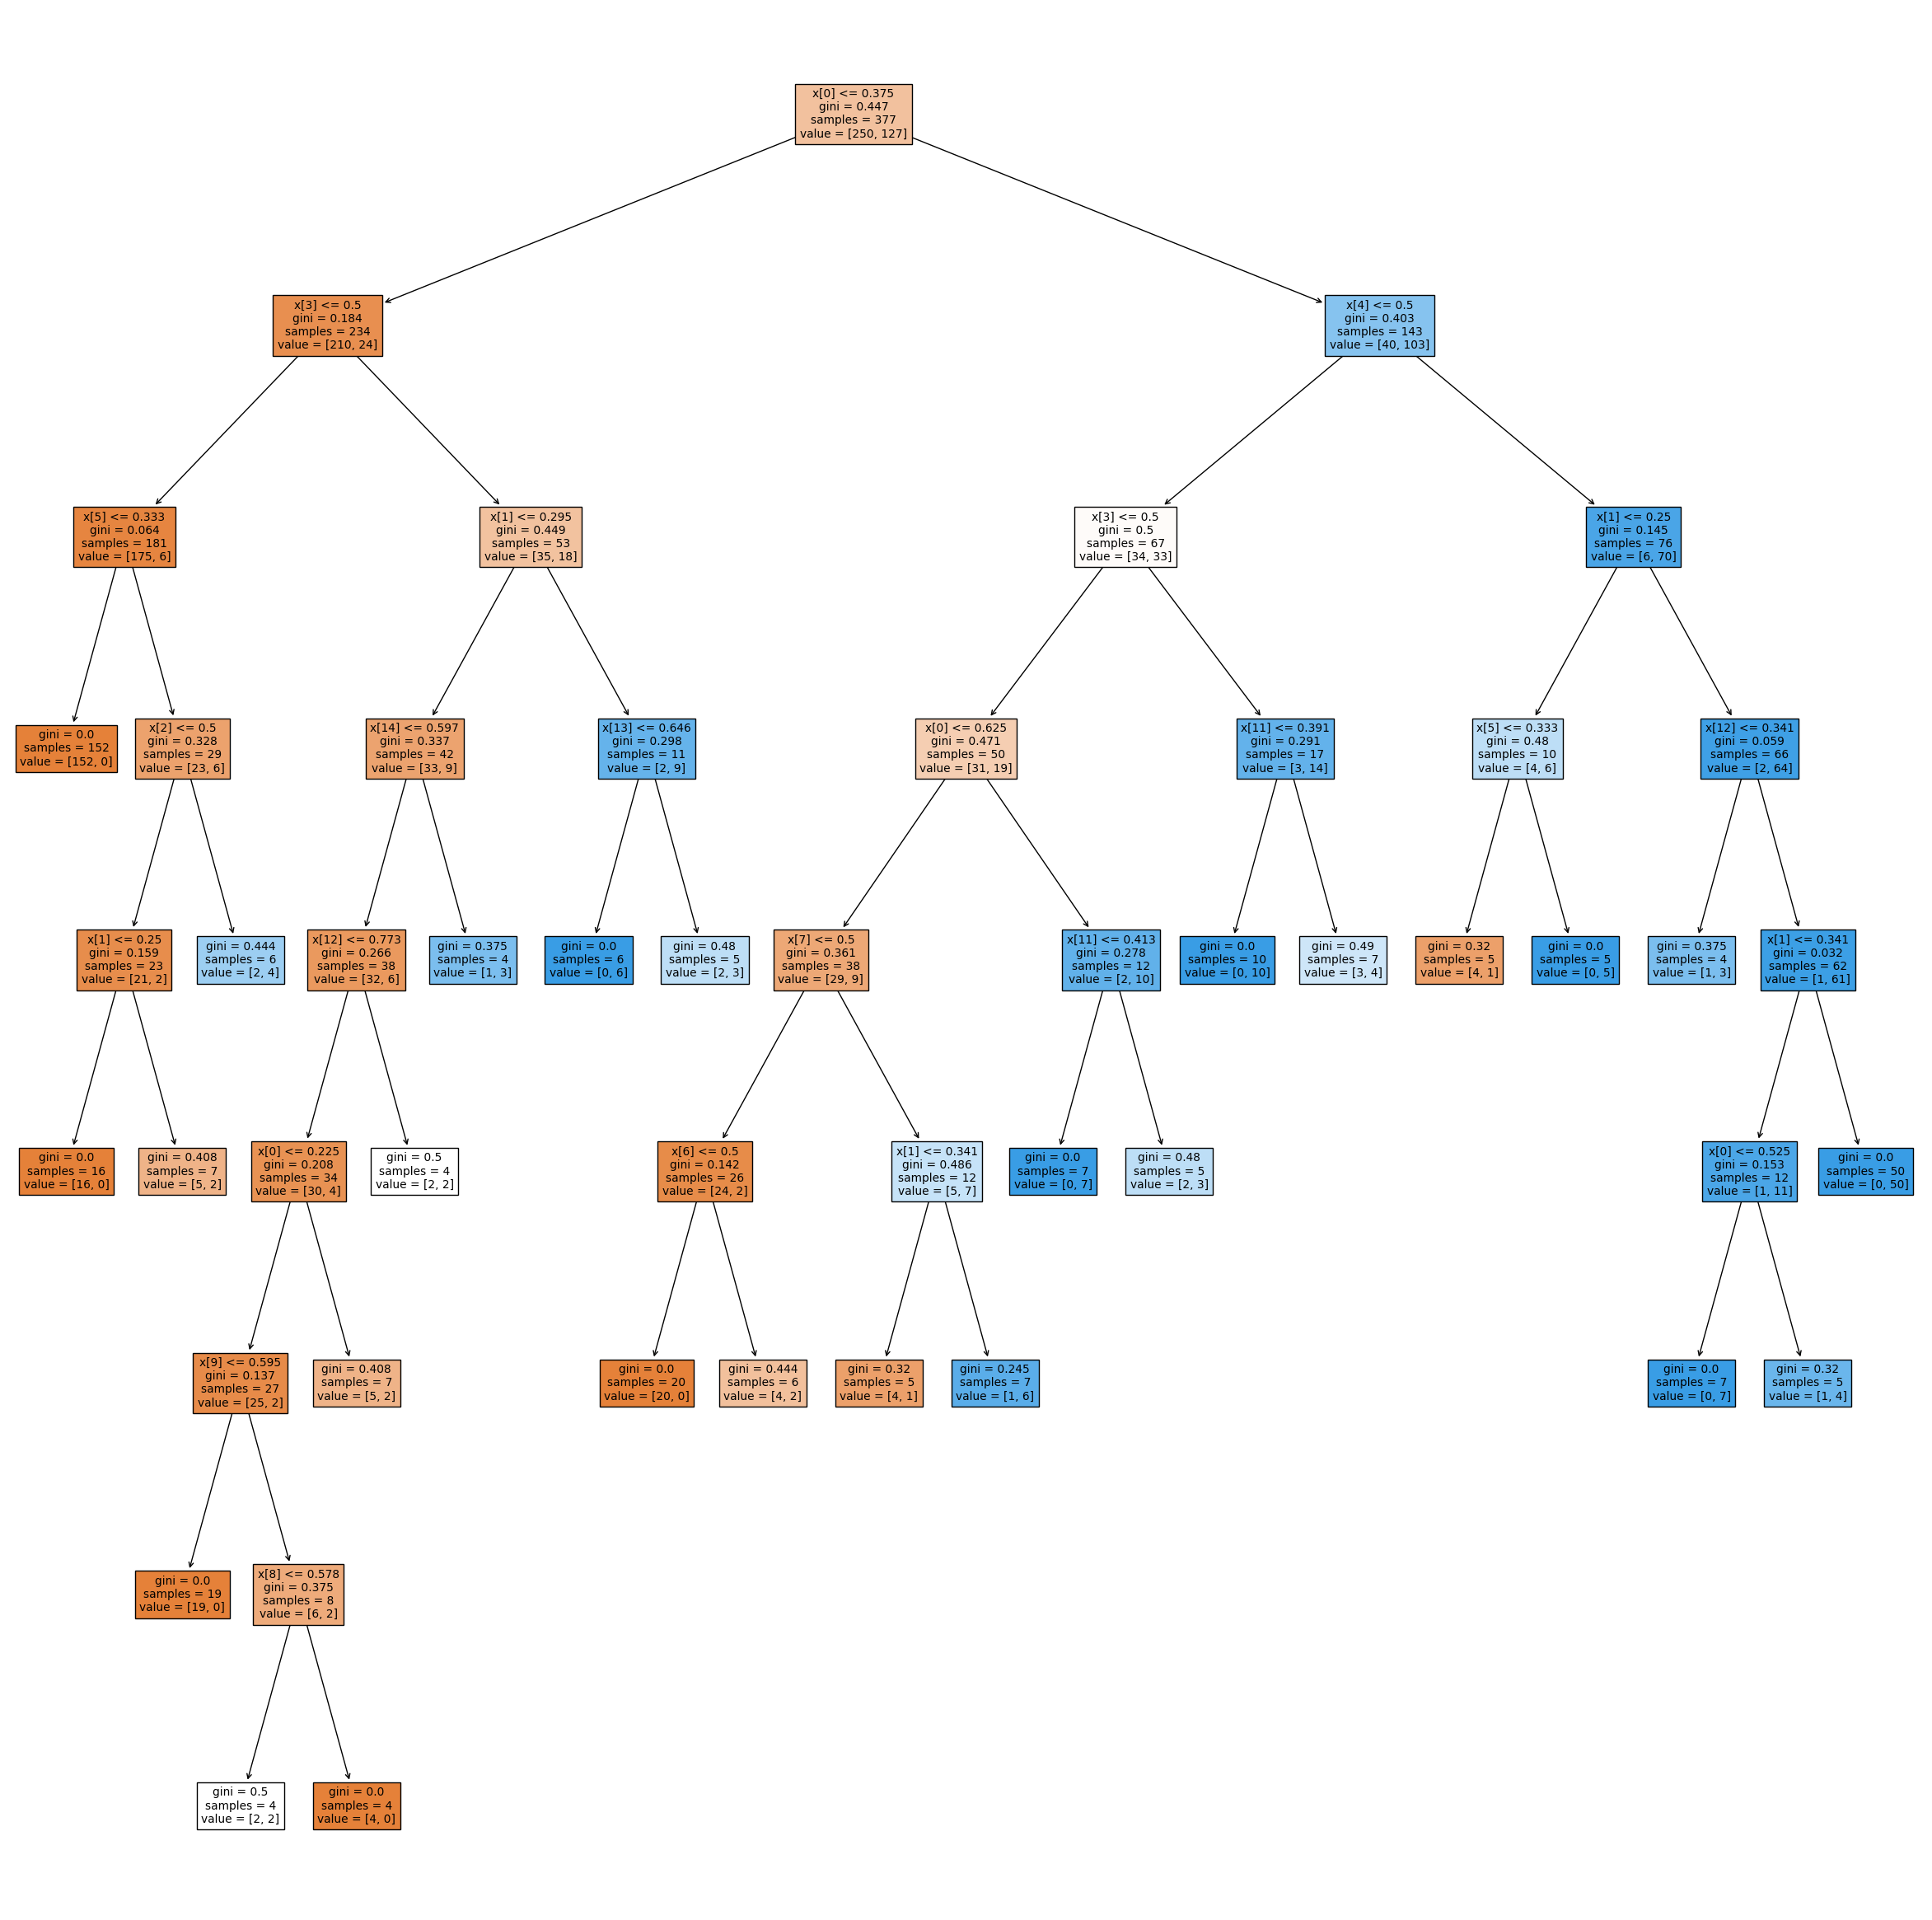

In [197]:
fig = plt.figure(figsize=(30,30))
dtree_plot = tree.plot_tree(dtree_clf,filled=True)

#### Analyzation of the model

In [198]:
print(metrics.classification_report(y_val, y_pred_dtree))

              precision    recall  f1-score   support

         0.0       0.90      0.92      0.91        79
         1.0       0.82      0.77      0.79        35

    accuracy                           0.88       114
   macro avg       0.86      0.85      0.85       114
weighted avg       0.88      0.88      0.88       114



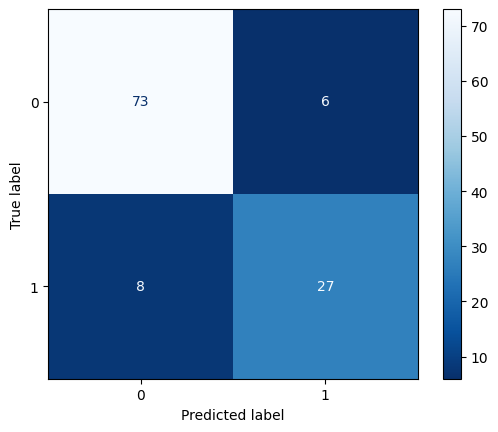

In [199]:
cm_dree = metrics.confusion_matrix(y_val, y_pred_dtree)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_dree, display_labels = ['0','1'])
disp.plot(cmap="Blues_r")
plt.show()

## 2.SVM

In [200]:
S = SVC(kernel = 'linear')
S.fit(X_train,y_train)

SVC(kernel='linear')

In [201]:
y_pred_svm = S.predict(X_val)

In [202]:
acc_svm = accuracy_score(y_val,y_pred_svm)
print(acc_svm)

0.9210526315789473


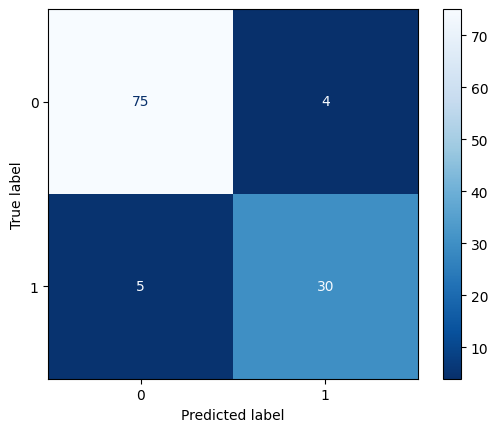

In [203]:
cm_svm = metrics.confusion_matrix(y_val, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_svm, display_labels = ['0','1'])
disp.plot(cmap="Blues_r")
plt.show()

## 3.Naive Bayes classifier

In [204]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score


In [206]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import numpy as np

# Find indices of samples without NaN values
valid_indices = np.where(~np.isnan(X).any(axis=1))[0]

# Use only valid samples for training and testing
X_valid = X[valid_indices]
y_valid = y[valid_indices]

# K-fold cross-validation
kf = KFold(n_splits=5, shuffle=True)
accuracy_scores = []

for train_index, test_index in kf.split(X_valid):
    X_train, X_test = X_valid[train_index], X_valid[test_index]
    y_train, y_test = y_valid[train_index], y_valid[test_index]

    # Gaussian Naive Bayes model
    gnb = GaussianNB()

    # Fit model with Laplace smoothing
    gnb.fit(X_train, y_train)

    # Make predictions
    y_pred = gnb.predict(X_test)

    # Evaluate cross-validation accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Print average accuracy
print("Accuracy:", np.mean(accuracy_scores) * 100, "%")


Accuracy: 88.14814814814815 %


In [210]:
from sklearn.metrics import accuracy_score

# Assuming you have a Naive Bayes model named nb_model
gnb.fit(X_train, y_train)
y_pred_nb = gnb.predict(X_val)

# Calculate and print accuracy
acc_nb = accuracy_score(y_val, y_pred_nb)
print("Accuracy for Naive Bayes:", acc_nb)


Accuracy for Naive Bayes: 0.9122807017543859


In [211]:
print(metrics.classification_report(y_val, y_pred_nb))

              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94        79
         1.0       0.86      0.86      0.86        35

    accuracy                           0.91       114
   macro avg       0.90      0.90      0.90       114
weighted avg       0.91      0.91      0.91       114



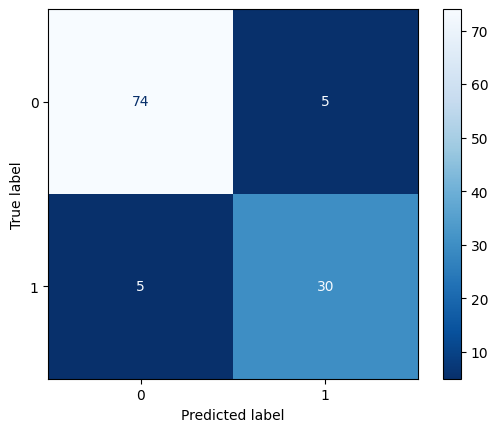

In [212]:
cm_nb = metrics.confusion_matrix(y_val, y_pred_nb)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_nb, display_labels = ['0','1'])
disp.plot(cmap="Blues_r")
plt.show()

## 4.XG Boost

In [213]:
pip install xgboost

In [214]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier



In [215]:
# Train XGBoost model
model = XGBClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 87.96%


# Comparing Different Models

Using a box plot

In [216]:
# Comparing Different Models - Pie Chart

# Create a dictionary to store the accuracies of different models
model_accuracies = {
    'Decision Tree': acc_dtree,
    'SVM': acc_svm,
    'Naive Bayes': acc_nb,
    'XG Boost': accuracy_score(y_test, y_pred)
}


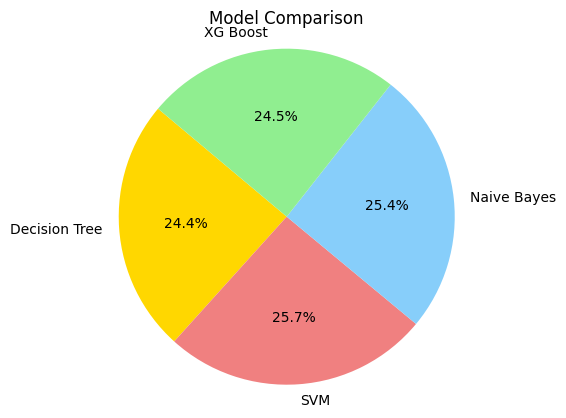

In [217]:
# Plotting the pie chart
labels = model_accuracies.keys()
sizes = model_accuracies.values()
colors = ['gold', 'lightcoral', 'lightskyblue', 'lightgreen']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Model Comparison')
plt.show()

plt.show()

In [218]:
# Comparing Different Models - Bar Graph

# Create a dictionary to store the accuracies of different models
model_accuracies = {
    'Decision Tree': acc_dtree,
    'SVM': acc_svm,
    'Naive Bayes': acc_nb,
    'XG Boost': accuracy_score(y_test, y_pred)
}


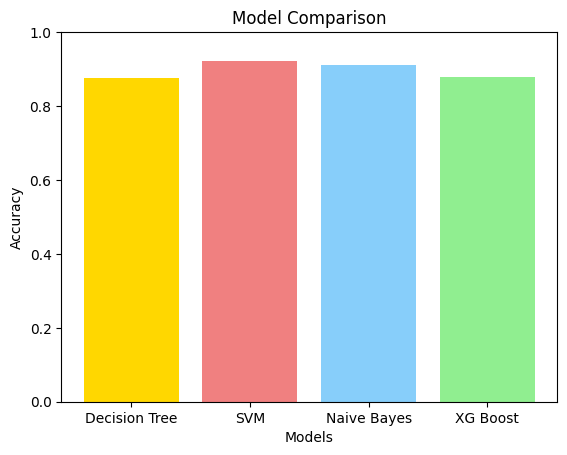

In [219]:
# Plotting the bar graph
plt.bar(model_accuracies.keys(), model_accuracies.values(), color=['gold', 'lightcoral', 'lightskyblue', 'lightgreen'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.ylim(0, 1)  # Set the y-axis limit between 0 and 1 for accuracy percentage
plt.show()

In [220]:
# Printing the accuracy results of each algorithm
print("Decision Tree Accuracy:", acc_dtree*100)
print("SVM Accuracy:", acc_svm*100)
print("Naive Bayes Accuracy:", acc_nb*100)
print("XG Boost Accuracy:", accuracy_score(y_test, y_pred)*100)


Decision Tree Accuracy: 87.71929824561403
SVM Accuracy: 92.10526315789474
Naive Bayes Accuracy: 91.22807017543859
XG Boost Accuracy: 87.96296296296296
